# Etape 1 Importation des données et configuration initiale


In [1]:
# 1. Importation des bibliothèques
import pandas as pd  # Manipulation des données
import numpy as np  # Calculs numériques
import matplotlib.pyplot as plt  # Visualisation de données
import seaborn as sns  # Visualisation avancée
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Prétraitement des données
from datetime import datetime  # Manipulation des dates

# Configuration pour un affichage clair des graphiques
sns.set_theme(style="whitegrid")

print("Bibliothèques importées avec succès !")


Bibliothèques importées avec succès !


In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [4]:
data = pd.read_csv('HomeC.csv')


In [5]:
data.head()

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  Cellar [kW]  \
0        0.020700        0.061917          0.442633     0.124150     0.006983   
1        0.020717        0.063817          0.444067     0.124000     0.006983   
2        0.020700        0.062317          0.446067     0.123533     0.006983   
3        0.106900        0.068517          0.446583     0.123133     0.006983   
4        0.236933        0.063983          0.446533     0.122850     0.006850   

   Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  Kitchen 38 [kW]  \
0          0.013083         0.000417         0.000150         0.000000   
1          0.013117         0.000417         0.000150         0.000000   
2          0.013083         0.000433         0.000167         0.000017   
3          0.013000         0.000433         0.000217         0.000000   
4          0.012783         0.000450         0.000333         0.000000   

   Barn [kW]  Well [kW]  Microwave [kW]  Living room [kW]  Solar [kW]  \
0   0.031350   0.001017        0.004067          0.001517    0.003483   
1   0.031500   0.001017        0.004067          0.001650    0.003467   
2   0.031517   0.001000        0.004067          0.001650    0.003467   
3   0.031500   0.001017        0.004067          0.001617    0.003483   
4   0.031500   0.001017        0.004067          0.001583    0.003467   

   temperature         icon  humidity  visibility summary  \
0        36.14  clear-night      0.62        10.0   Clear   
1        36.14  clear-night      0.62        10.0   Clear   
2        36.14  clear-night      0.62        10.0   Clear   
3        36.14  clear-night      0.62        10.0   Clear   
4        36.14  clear-night      0.62        10.0   Clear   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18  cloudCover          282   
1                29.26   1016.91       9.18  cloudCover          282   
2                29.26   1016.91       9.18  cloudCover          282   
3                29.26   1016.91       9.18  cloudCover          282   
4                29.26   1016.91       9.18  cloudCover          282   

   precipIntensity  dewPoint  precipProbability  
0              0.0      24.4                0.0  
1              0.0      24.4                0.0  
2              0.0      24.4                0.0  
3              0.0      24.4                0.0  
4              0.0      24.4                0.0

# Etape 2 : Prétraitement des données

In [6]:
data = data[pd.to_numeric(data['time'], errors='coerce').notnull()]  # Conserver uniquement les valeurs numériques


In [7]:
data['time'] = pd.to_datetime(data['time'], unit='s')

In [8]:
data['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(data),
freq='min'))


In [9]:
data = data.set_index('time')

In [10]:
data.isnull().sum()


use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Cellar [kW]            0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [11]:
data['summary'].unique()


array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [12]:
data.columns = [i.replace(' [kW]', '') for i in data.columns]

In [13]:
data['Furnace'] = data[['Furnace 1', 'Furnace 2']].sum(axis=1)


In [14]:
data['Kitchen'] = data[['Kitchen 12', 'Kitchen 14', 'Kitchen 38']].sum(axis=1)

In [15]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['Furnace 1', 'Furnace 2', 'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'icon', 'summary']

# Vérifiez que ces colonnes existent avant de les supprimer
colonnes_existantes = [col for col in colonnes_a_supprimer if col in data.columns]

# Suppression des colonnes existantes
data = data.drop(columns=colonnes_existantes)

print("Colonnes supprimées avec succès. Aperçu du DataFrame :")
data.head()


Colonnes supprimées avec succès. Aperçu du DataFrame :


use       gen  House overall  Dishwasher  \
time                                                                 
2016-01-01 05:00:00  0.932833  0.003483       0.932833    0.000033   
2016-01-01 05:01:00  0.934333  0.003467       0.934333    0.000000   
2016-01-01 05:02:00  0.931817  0.003467       0.931817    0.000017   
2016-01-01 05:03:00  1.022050  0.003483       1.022050    0.000017   
2016-01-01 05:04:00  1.139400  0.003467       1.139400    0.000133   

                     Home office    Fridge    Cellar  Garage door      Barn  \
time                                                                          
2016-01-01 05:00:00     0.442633  0.124150  0.006983     0.013083  0.031350   
2016-01-01 05:01:00     0.444067  0.124000  0.006983     0.013117  0.031500   
2016-01-01 05:02:00     0.446067  0.123533  0.006983     0.013083  0.031517   
2016-01-01 05:03:00     0.446583  0.123133  0.006983     0.013000  0.031500   
2016-01-01 05:04:00     0.446533  0.122850  0.006850     0.012783  0.031500   

                         Well  Microwave  Living room     Solar  temperature  \
time                                                                           
2016-01-01 05:00:00  0.001017   0.004067     0.001517  0.003483        36.14   
2016-01-01 05:01:00  0.001017   0.004067     0.001650  0.003467        36.14   
2016-01-01 05:02:00  0.001000   0.004067     0.001650  0.003467        36.14   
2016-01-01 05:03:00  0.001017   0.004067     0.001617  0.003483        36.14   
2016-01-01 05:04:00  0.001017   0.004067     0.001583  0.003467        36.14   

                     humidity  visibility  apparentTemperature  pressure  \
time                                                                       
2016-01-01 05:00:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:01:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:02:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:03:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:04:00      0.62        10.0                29.26   1016.91   

                     windSpeed  cloudCover  windBearing  precipIntensity  \
time                                                                       
2016-01-01 05:00:00       9.18  cloudCover          282              0.0   
2016-01-01 05:01:00       9.18  cloudCover          282              0.0   
2016-01-01 05:02:00       9.18  cloudCover          282              0.0   
2016-01-01 05:03:00       9.18  cloudCover          282              0.0   
2016-01-01 05:04:00       9.18  cloudCover          282              0.0   

                     dewPoint  precipProbability   Furnace   Kitchen  
time                                                                  
2016-01-01 05:00:00      24.4                0.0  0.082617  0.000567  
2016-01-01 05:01:00      24.4                0.0  0.084533  0.000567  
2016-01-01 05:02:00      24.4                0.0  0.083017  0.000617  
2016-01-01 05:03:00      24.4                0.0  0.175417  0.000650  
2016-01-01 05:04:00      24.4                0.0  0.300917  0.000783

In [16]:
# Vérifiez si la colonne 'cloudCover' existe
if 'cloudCover' in data.columns:
    # Remplacement des valeurs invalides (NaN) avec la méthode de rétro-remplissage
    data['cloudCover'] = data['cloudCover'].fillna(method='bfill')
    print("Valeurs invalides dans la colonne 'cloudCover' remplacées avec succès.")
    
    # Vérifiez s'il reste des NaN après le rétro-remplissage
    if data['cloudCover'].isna().sum() == 0:
        print("Toutes les valeurs manquantes ont été remplacées.")
    else:
        print(f"Il reste {data['cloudCover'].isna().sum()} valeurs manquantes.")
else:
    print("La colonne 'cloudCover' n'existe pas dans le DataFrame.")


Valeurs invalides dans la colonne 'cloudCover' remplacées avec succès.
Toutes les valeurs manquantes ont été remplacées.


In [ ]:
print(data['cloudCover'].unique())

['cloudCover' '0.75' '0' '1' '0.31' '0.44' '0.13' '0.19' '0.25' '0.16'
 '0.21' '0.15' '0.14' '0.27' '0.28' '0.17' '0.05' '0.1' '0.26' '0.29'
 '0.11' '0.09' '0.12' '0.06' '0.02' '0.08' '0.04' '0.35' '0.22' '0.23'
 '0.54' '0.39' '0.03' '0.07' '0.76' '0.62' '0.18' '0.79' '0.48' '0.24'
 '0.57' 0.24 1.0 0.31 0.28 0.15 0.41 0.1 0.12 0.08 0.09 0.19 0.04 0.05
 0.29 0.27 0.35 0.18 0.06 0.03 0.11 0.14 0.25 0.78 0.0 0.16 0.21 0.23 0.17
 0.75 0.26 0.2 0.76 0.13 0.77 0.46 0.07 0.55 0.02 0.01 0.51 0.47 0.5 0.4
 0.3 0.22 0.43 0.33 0.6 0.68 0.66 0.45 0.34 0.52 0.67 0.48 0.49 0.39 0.37
 0.62 0.36 0.79 0.61 0.38 0.42 0.53 0.63 0.44 0.54 0.32 0.56 0.58 0.72
 0.57 0.73 0.71 0.64 0.59]


In [18]:
# Conversion de la colonne 'cloudCover' en numérique, valeurs non convertibles remplacées par NaN
data['cloudCover'] = pd.to_numeric(data['cloudCover'], errors='coerce')


In [19]:
data['cloudCover'] = data['cloudCover'].astype('float')

In [20]:
data.head()

use       gen  House overall  Dishwasher  \
time                                                                 
2016-01-01 05:00:00  0.932833  0.003483       0.932833    0.000033   
2016-01-01 05:01:00  0.934333  0.003467       0.934333    0.000000   
2016-01-01 05:02:00  0.931817  0.003467       0.931817    0.000017   
2016-01-01 05:03:00  1.022050  0.003483       1.022050    0.000017   
2016-01-01 05:04:00  1.139400  0.003467       1.139400    0.000133   

                     Home office    Fridge    Cellar  Garage door      Barn  \
time                                                                          
2016-01-01 05:00:00     0.442633  0.124150  0.006983     0.013083  0.031350   
2016-01-01 05:01:00     0.444067  0.124000  0.006983     0.013117  0.031500   
2016-01-01 05:02:00     0.446067  0.123533  0.006983     0.013083  0.031517   
2016-01-01 05:03:00     0.446583  0.123133  0.006983     0.013000  0.031500   
2016-01-01 05:04:00     0.446533  0.122850  0.006850     0.012783  0.031500   

                         Well  Microwave  Living room     Solar  temperature  \
time                                                                           
2016-01-01 05:00:00  0.001017   0.004067     0.001517  0.003483        36.14   
2016-01-01 05:01:00  0.001017   0.004067     0.001650  0.003467        36.14   
2016-01-01 05:02:00  0.001000   0.004067     0.001650  0.003467        36.14   
2016-01-01 05:03:00  0.001017   0.004067     0.001617  0.003483        36.14   
2016-01-01 05:04:00  0.001017   0.004067     0.001583  0.003467        36.14   

                     humidity  visibility  apparentTemperature  pressure  \
time                                                                       
2016-01-01 05:00:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:01:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:02:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:03:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:04:00      0.62        10.0                29.26   1016.91   

                     windSpeed  cloudCover  windBearing  precipIntensity  \
time                                                                       
2016-01-01 05:00:00       9.18         NaN          282              0.0   
2016-01-01 05:01:00       9.18         NaN          282              0.0   
2016-01-01 05:02:00       9.18         NaN          282              0.0   
2016-01-01 05:03:00       9.18         NaN          282              0.0   
2016-01-01 05:04:00       9.18         NaN          282              0.0   

                     dewPoint  precipProbability   Furnace   Kitchen  
time                                                                  
2016-01-01 05:00:00      24.4                0.0  0.082617  0.000567  
2016-01-01 05:01:00      24.4                0.0  0.084533  0.000567  
2016-01-01 05:02:00      24.4                0.0  0.083017  0.000617  
2016-01-01 05:03:00      24.4                0.0  0.175417  0.000650  
2016-01-01 05:04:00      24.4                0.0  0.300917  0.000783

In [21]:
print(data['use'].equals(data['House overall']))

True


In [22]:
# Catégories de colonnes
weather_columns = ['temperature','humidity','visibility', 'apparentTemperature',  'pressure',
                   'windSpeed', 'cloudCover','windBearing', 'precipIntensity','dewPoint', 'precipProbability']
energy_columns = ['use', 'gen','House overall','Dishwasher','Home office','Fridge','Cellar',
                  'Garage door','Barn','Well','Microwave','Living room',  'Furnace', 'Kitchen', 'Solar', 
                    ]

In [23]:
# Combinaison des colonnes dans l'ordre souhaité
ordered_columns = weather_columns + energy_columns

# Réorganisation du DataFrame
data = data[ordered_columns]

In [ ]:
data.tail()

temperature  humidity  visibility  apparentTemperature  \
time                                                                          
2016-12-16 03:25:00        35.12      0.86        8.74                29.45   
2016-12-16 03:26:00        35.12      0.86        8.74                29.45   
2016-12-16 03:27:00        35.12      0.86        8.74                29.45   
2016-12-16 03:28:00        35.12      0.86        8.74                29.45   
2016-12-16 03:29:00        35.12      0.86        8.74                29.45   

                     pressure  windSpeed  cloudCover  windBearing  \
time                                                                
2016-12-16 03:25:00   1011.49       6.72        0.31          186   
2016-12-16 03:26:00   1011.49       6.72        0.31          186   
2016-12-16 03:27:00   1011.49       6.72        0.31          186   
2016-12-16 03:28:00   1011.49       6.72        0.31          186   
2016-12-16 03:29:00   1011.49       6.72        0.31          186   

                     precipIntensity  dewPoint  precipProbability       use  \
time                                                                          
2016-12-16 03:25:00           0.0101     31.27               0.51  1.601233   
2016-12-16 03:26:00           0.0101     31.27               0.51  1.599333   
2016-12-16 03:27:00           0.0101     31.27               0.51  1.924267   
2016-12-16 03:28:00           0.0101     31.27               0.51  1.978200   
2016-12-16 03:29:00           0.0101     31.27               0.51  1.990950   

                          gen  House overall  Dishwasher  Home office  \
time                                                                    
2016-12-16 03:25:00  0.003183       1.601233    0.000050     0.041783   
2016-12-16 03:26:00  0.003233       1.599333    0.000050     0.041750   
2016-12-16 03:27:00  0.003217       1.924267    0.000033     0.042033   
2016-12-16 03:28:00  0.003217       1.978200    0.000050     0.042100   
2016-12-16 03:29:00  0.003233       1.990950    0.000050     0.042100   

                       Fridge    Cellar  Garage door      Barn      Well  \
time                                                                       
2016-12-16 03:25:00  0.005267  0.008667     0.013483  0.032283  0.000983   
2016-12-16 03:26:00  0.005233  0.008433     0.013433  0.032200  0.000950   
2016-12-16 03:27:00  0.004983  0.008467     0.012933  0.032283  0.001000   
2016-12-16 03:28:00  0.005333  0.008233     0.012817  0.032183  0.000950   
2016-12-16 03:29:00  0.004917  0.008133     0.012833  0.032167  0.000950   

                     Microwave  Living room   Furnace   Kitchen     Solar  
time                                                                       
2016-12-16 03:25:00   0.003800     0.000967  0.727683  0.000633  0.003183  
2016-12-16 03:26:00   0.003800     0.000933  0.729050  0.000600  0.003233  
2016-12-16 03:27:00   0.003750     0.001000  1.060117  0.000600  0.003217  
2016-12-16 03:28:00   0.003767     0.000950  1.116033  0.000650  0.003217  
2016-12-16 03:29:00   0.003767     0.000950  1.128833  0.000650  0.003233

In [25]:
data.head()

temperature  humidity  visibility  apparentTemperature  \
time                                                                          
2016-01-01 05:00:00        36.14      0.62        10.0                29.26   
2016-01-01 05:01:00        36.14      0.62        10.0                29.26   
2016-01-01 05:02:00        36.14      0.62        10.0                29.26   
2016-01-01 05:03:00        36.14      0.62        10.0                29.26   
2016-01-01 05:04:00        36.14      0.62        10.0                29.26   

                     pressure  windSpeed  cloudCover  windBearing  \
time                                                                
2016-01-01 05:00:00   1016.91       9.18         NaN          282   
2016-01-01 05:01:00   1016.91       9.18         NaN          282   
2016-01-01 05:02:00   1016.91       9.18         NaN          282   
2016-01-01 05:03:00   1016.91       9.18         NaN          282   
2016-01-01 05:04:00   1016.91       9.18         NaN          282   

                     precipIntensity  dewPoint  precipProbability       use  \
time                                                                          
2016-01-01 05:00:00              0.0      24.4                0.0  0.932833   
2016-01-01 05:01:00              0.0      24.4                0.0  0.934333   
2016-01-01 05:02:00              0.0      24.4                0.0  0.931817   
2016-01-01 05:03:00              0.0      24.4                0.0  1.022050   
2016-01-01 05:04:00              0.0      24.4                0.0  1.139400   

                          gen  House overall  Dishwasher  Home office  \
time                                                                    
2016-01-01 05:00:00  0.003483       0.932833    0.000033     0.442633   
2016-01-01 05:01:00  0.003467       0.934333    0.000000     0.444067   
2016-01-01 05:02:00  0.003467       0.931817    0.000017     0.446067   
2016-01-01 05:03:00  0.003483       1.022050    0.000017     0.446583   
2016-01-01 05:04:00  0.003467       1.139400    0.000133     0.446533   

                       Fridge    Cellar  Garage door      Barn      Well  \
time                                                                       
2016-01-01 05:00:00  0.124150  0.006983     0.013083  0.031350  0.001017   
2016-01-01 05:01:00  0.124000  0.006983     0.013117  0.031500  0.001017   
2016-01-01 05:02:00  0.123533  0.006983     0.013083  0.031517  0.001000   
2016-01-01 05:03:00  0.123133  0.006983     0.013000  0.031500  0.001017   
2016-01-01 05:04:00  0.122850  0.006850     0.012783  0.031500  0.001017   

                     Microwave  Living room   Furnace   Kitchen     Solar  
time                                                                       
2016-01-01 05:00:00   0.004067     0.001517  0.082617  0.000567  0.003483  
2016-01-01 05:01:00   0.004067     0.001650  0.084533  0.000567  0.003467  
2016-01-01 05:02:00   0.004067     0.001650  0.083017  0.000617  0.003467  
2016-01-01 05:03:00   0.004067     0.001617  0.175417  0.000650  0.003483  
2016-01-01 05:04:00   0.004067     0.001583  0.300917  0.000783  0.003467

# Etape 3 : Corrélations liées à l'énergie

In [26]:
energy_columns = data.columns[11:].tolist()


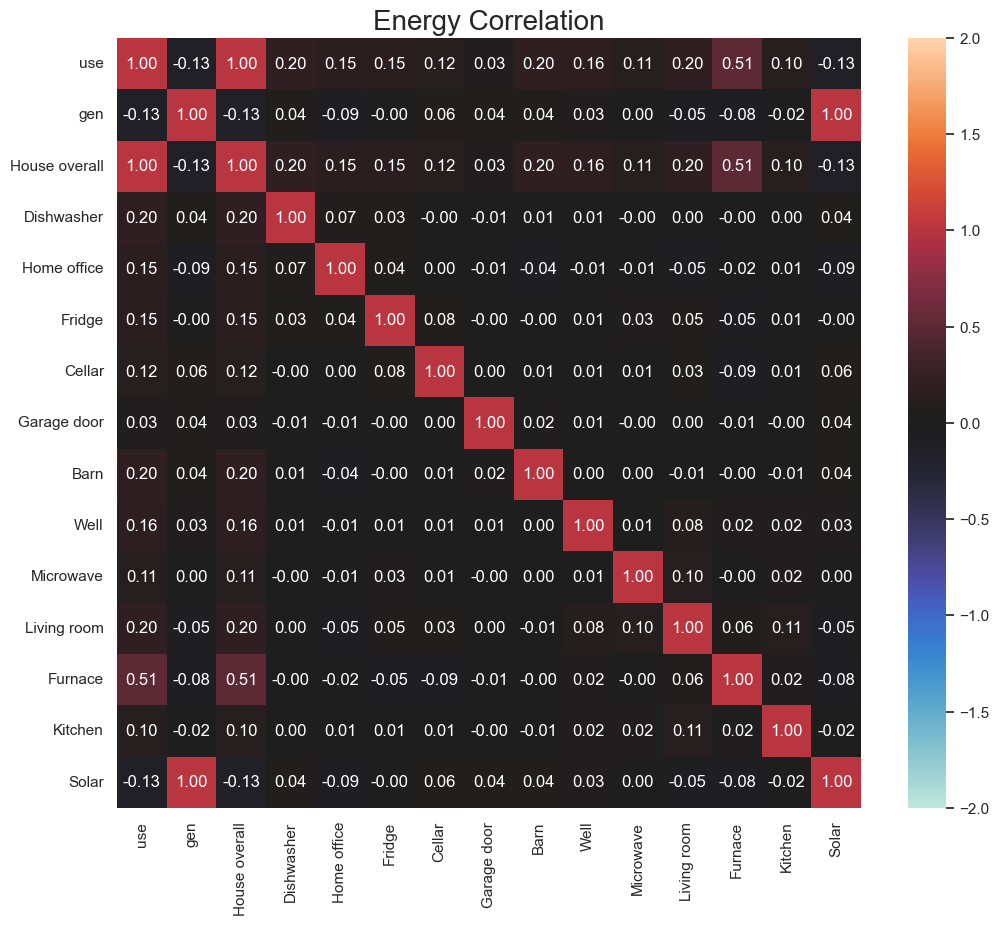

In [27]:
# Set the figure size to make the heatmap bigger (e.g., 12x10 inches)
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(data[energy_columns].corr(), annot=True, fmt='.2f', vmin=-2, vmax=2, center=0)

# Set the title
plt.title('Energy Correlation', fontsize=20)

# Show the plot
plt.show()

In [28]:
print(data['gen'].equals(data['Solar']))


True


vu que la data gen et identique a la data solar et aussi la data use est identique a la data house overall on drop la data use et la data gen 

In [29]:
#data.drop(['use', 'gen'], axis=1, inplace=True)

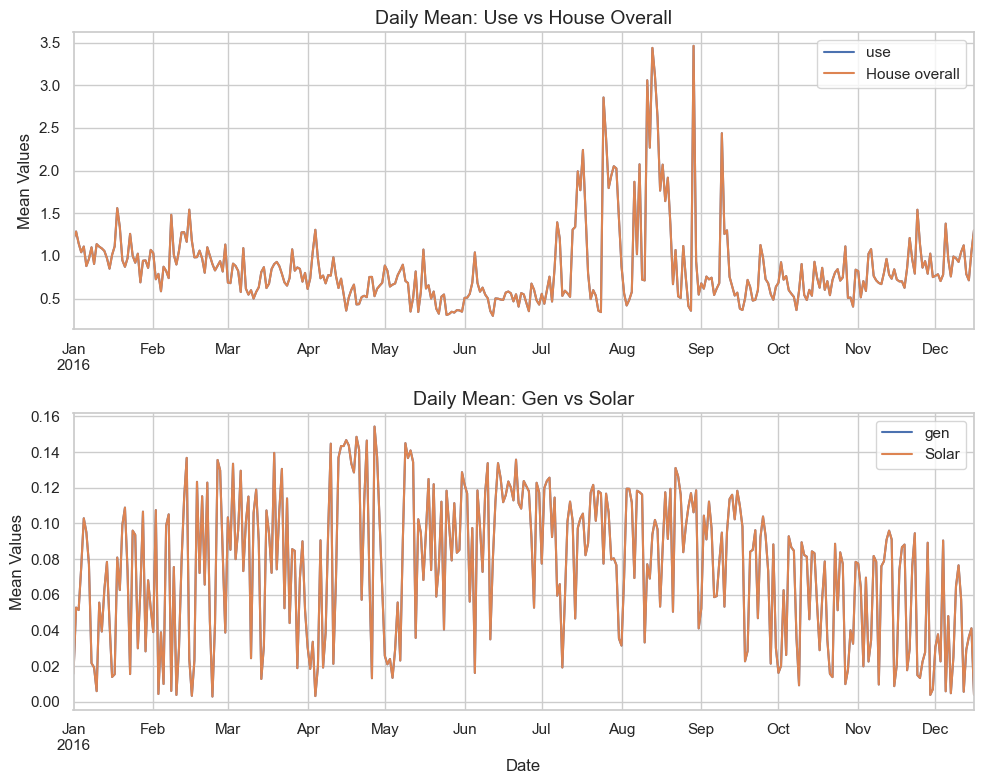

In [30]:


# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # Augmenter la taille pour un affichage plus clair

# Tracer les moyennes journalières pour 'use' et 'House overall'
data[['use', 'House overall']].resample('D').mean().plot(ax=axes[0])
axes[0].set_title('Daily Mean: Use vs House Overall', fontsize=14)
axes[0].set_xlabel('')  # Supprimez le label de l'axe X pour plus de clarté
axes[0].set_ylabel('Mean Values', fontsize=12)
axes[0].grid(True)  # Ajouter une grille

# Tracer les moyennes journalières pour 'gen' et 'Solar'
data[['gen', 'Solar']].resample('D').mean().plot(ax=axes[1])
axes[1].set_title('Daily Mean: Gen vs Solar', fontsize=14)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Mean Values', fontsize=12)
axes[1].grid(True)  # Ajouter une grille

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher la figure
plt.show()


# Etape 4 : Corrélations météorologiques


In [31]:
# Identifier les colonnes liées aux caractéristiques météorologiques
weather_columns = data.columns[:11].tolist()

# Vérifier les colonnes sélectionnées
print(weather_columns)


['temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability']


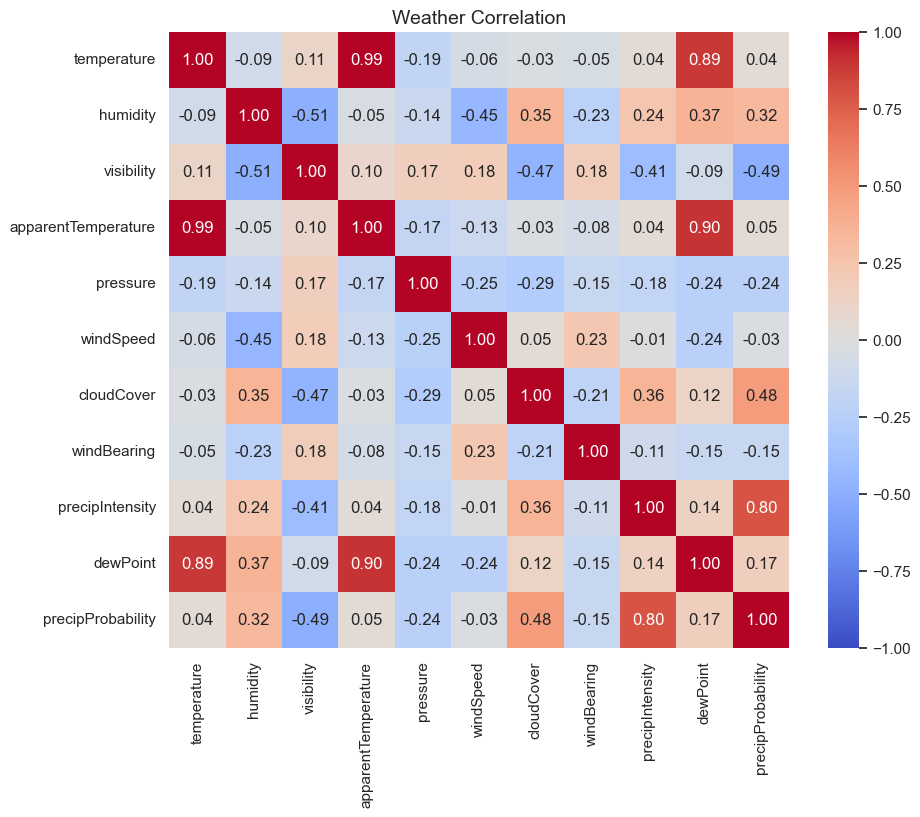

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the DataFrame to only weather-related columns
weather_data = data[weather_columns]

# Generate the correlation matrix and plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(weather_data.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Weather Correlation', fontsize=14)
plt.show()


Visualisation des tendances météorologiques


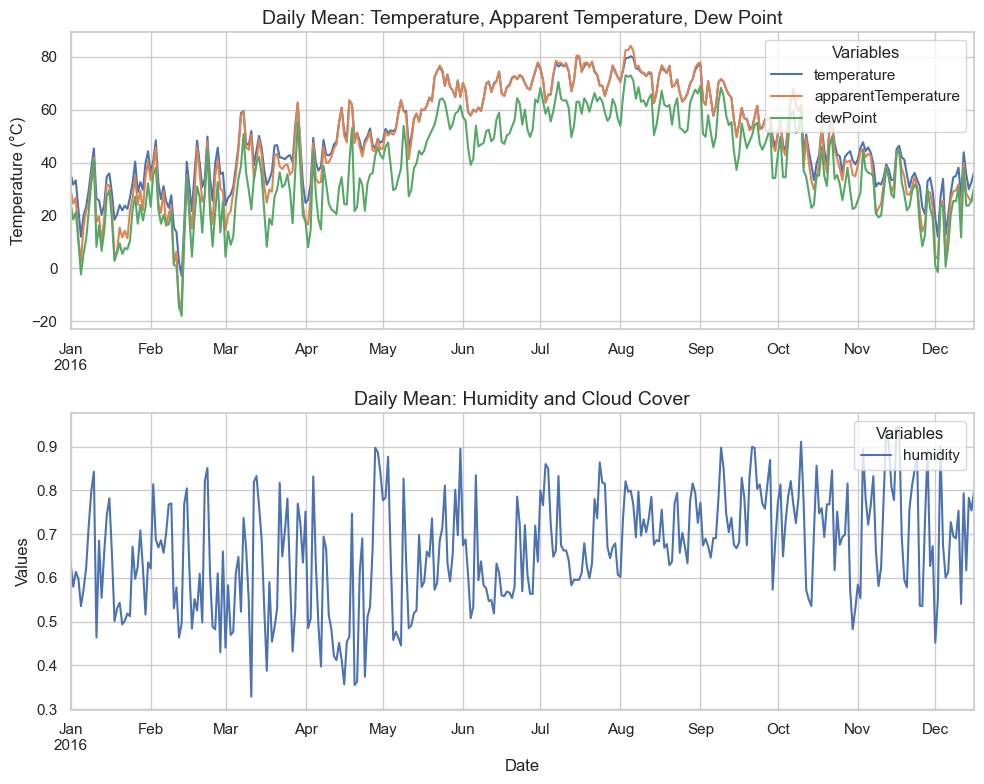

In [33]:
import matplotlib.pyplot as plt

# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # Augmenter figsize pour un meilleur affichage
# Tracer les courbes des moyennes journalières pour 'temperature', 'apparentTemperature' et 'dewPoint'
data[['temperature', 'apparentTemperature', 'dewPoint']].resample('D').mean().plot(ax=axes[0], grid=True)

# Ajouter des détails au sous-graphique
axes[0].set_title('Daily Mean: Temperature, Apparent Temperature, Dew Point', fontsize=14)
axes[0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0].set_xlabel('')  # Supprimer le label de l'axe X pour éviter la surcharge
axes[0].legend(title='Variables', loc='upper right')

# Exemple : Moyenne journalière pour 'humidity' et 'cloudCover'
data[['humidity']].resample('D').mean().plot(ax=axes[1], grid=True)

# Ajouter des détails au deuxième sous-graphique
axes[1].set_title('Daily Mean: Humidity and Cloud Cover', fontsize=14)
axes[1].set_ylabel('Values', fontsize=12)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].legend(title='Variables', loc='upper right')
# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()



# Étape 5 : Différence de température (Temperature Difference)

In [34]:
# Calculer la différence de température
data['Tdiff'] = data['apparentTemperature'] - data['temperature']


In [35]:
# Identifier les colonnes météo
clima = data.columns[13:-1].tolist()  # Exclure la dernière colonne Tdiff


In [36]:
# Initialiser une liste vide pour stocker les corrélations
lista_corr = []

# Calculer les corrélations
for col in clima:
    corr = data['Tdiff'].corr(data[col])
    lista_corr.append(corr)


In [37]:
# Créer un DataFrame avec les corrélations
data_corr = pd.DataFrame({'Weather_Feature': clima, 'Correlation_with_Tdiff': lista_corr})

# Afficher les résultats
print(data_corr)


   Weather_Feature  Correlation_with_Tdiff
0    House overall               -0.020120
1       Dishwasher               -0.005319
2      Home office                0.003058
3           Fridge                0.080669
4           Cellar                0.221712
5      Garage door                0.010828
6             Barn               -0.001605
7             Well               -0.003916
8        Microwave                0.006294
9      Living room               -0.033783
10         Furnace               -0.315210
11         Kitchen                0.005570
12           Solar                0.086687


 Visualisation des tendances journalières

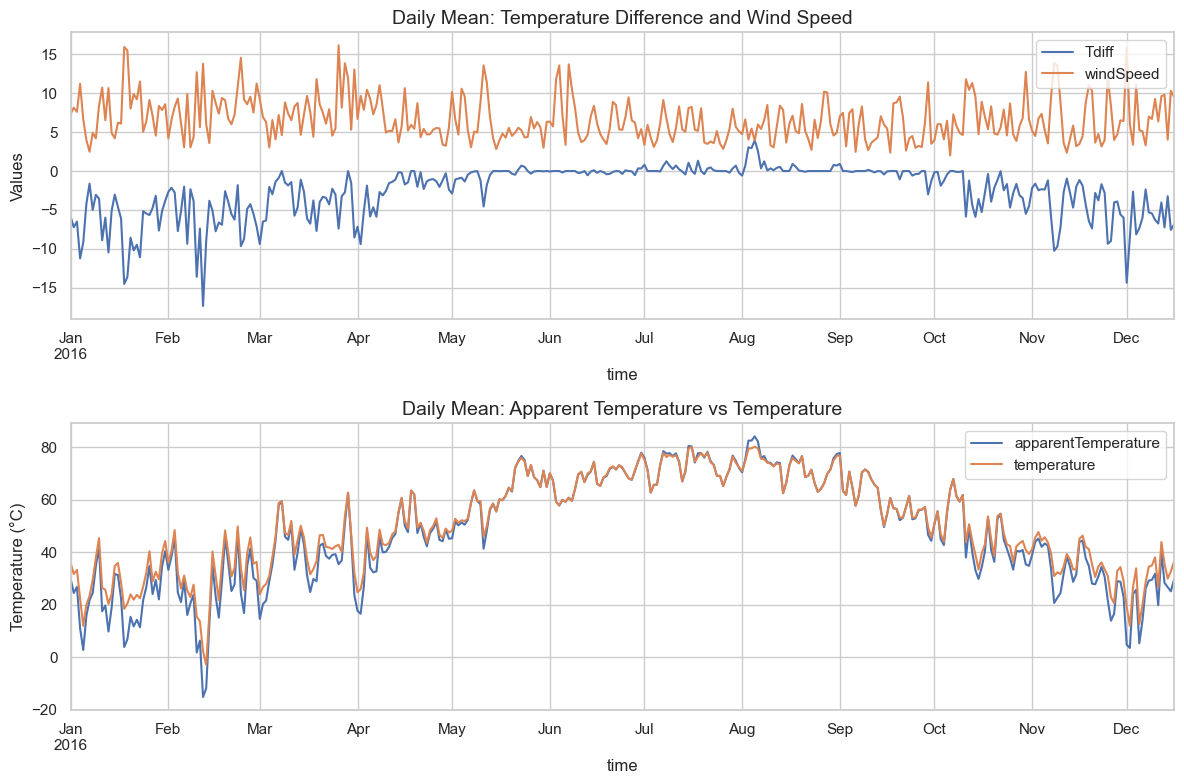

In [38]:
# Créer une figure avec deux sous-graphiques (2 lignes, 1 colonne)
fig, axes = plt.subplots(2, 1, figsize=(12, 8))  # Augmenté la taille pour une meilleure lisibilité
# Tracer les courbes de moyennes journalières pour Tdiff et windSpeed
data[['Tdiff', 'windSpeed']].resample('D').mean().plot(ax=axes[0], grid=True)
axes[0].set_title('Daily Mean: Temperature Difference and Wind Speed', fontsize=14)
axes[0].set_ylabel('Values')
axes[0].legend(loc='upper right')
# Tracer les courbes de moyennes journalières pour apparentTemperature et temperature
data[['apparentTemperature', 'temperature']].resample('D').mean().plot(ax=axes[1], grid=True)
axes[1].set_title('Daily Mean: Apparent Temperature vs Temperature', fontsize=14)
axes[1].set_ylabel('Temperature (°C)')
axes[1].legend(loc='upper right')
# Ajuster les marges et afficher la figure
plt.tight_layout()  # Ajuste automatiquement les espacements entre les sous-graphiques
plt.show()




Étape 6 : Visualisations des données

In [39]:
# Sélectionner les 6 premières colonnes liées à l'énergie
energy_columns_1 = data.columns[13:19].tolist()


In [40]:
# Calculer la moyenne quotidienne
energy_data_1 = data[energy_columns_1].resample('D').mean()


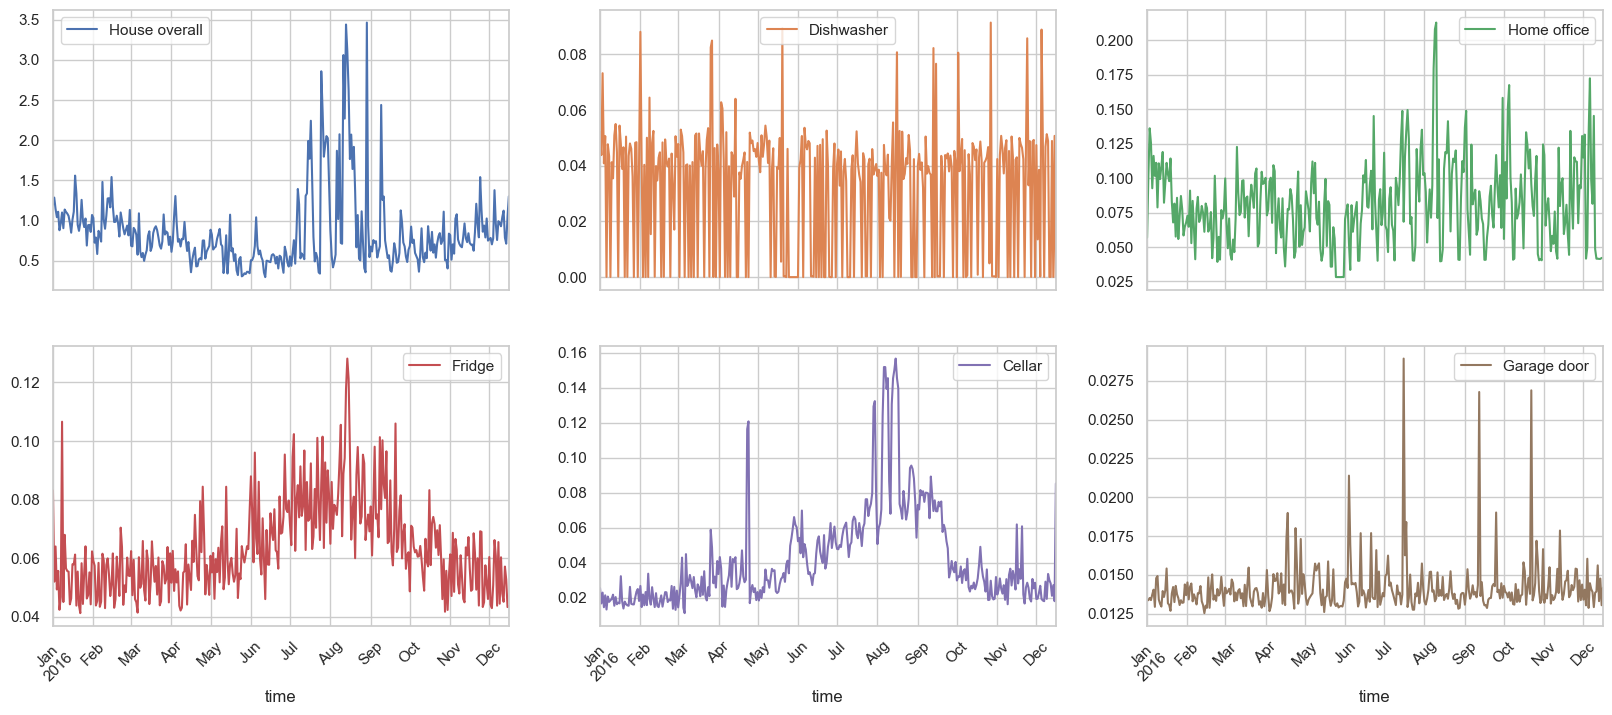

In [41]:
# Visualiser les moyennes journalières avec des sous-graphiques
energy_data_1.plot(
    subplots=True,        # Chaque colonne a son propre graphique
    layout=(-1, 3),       # Organisation automatique sur plusieurs lignes et 3 colonnes
    figsize=(20, 8),      # Taille de la figure
    grid=True,            # Ajouter une grille pour une meilleure lisibilité
    rot=45                # Rotation des labels de l'axe des x pour éviter le chevauchement
)

# Ajouter un titre global
plt.suptitle('', fontsize=16)
plt.show()


 Sélection et visualisation des colonnes d'énergie restantes

In [42]:
# Sélectionner les colonnes restantes liées à l'énergie (de la 7ème à la 13ème)
energy_columns_2 = data.columns[19:26].tolist()


In [43]:
# Calculer la moyenne quotidienne pour ces colonnes
energy_data_2 = data[energy_columns_2].resample('D').mean()


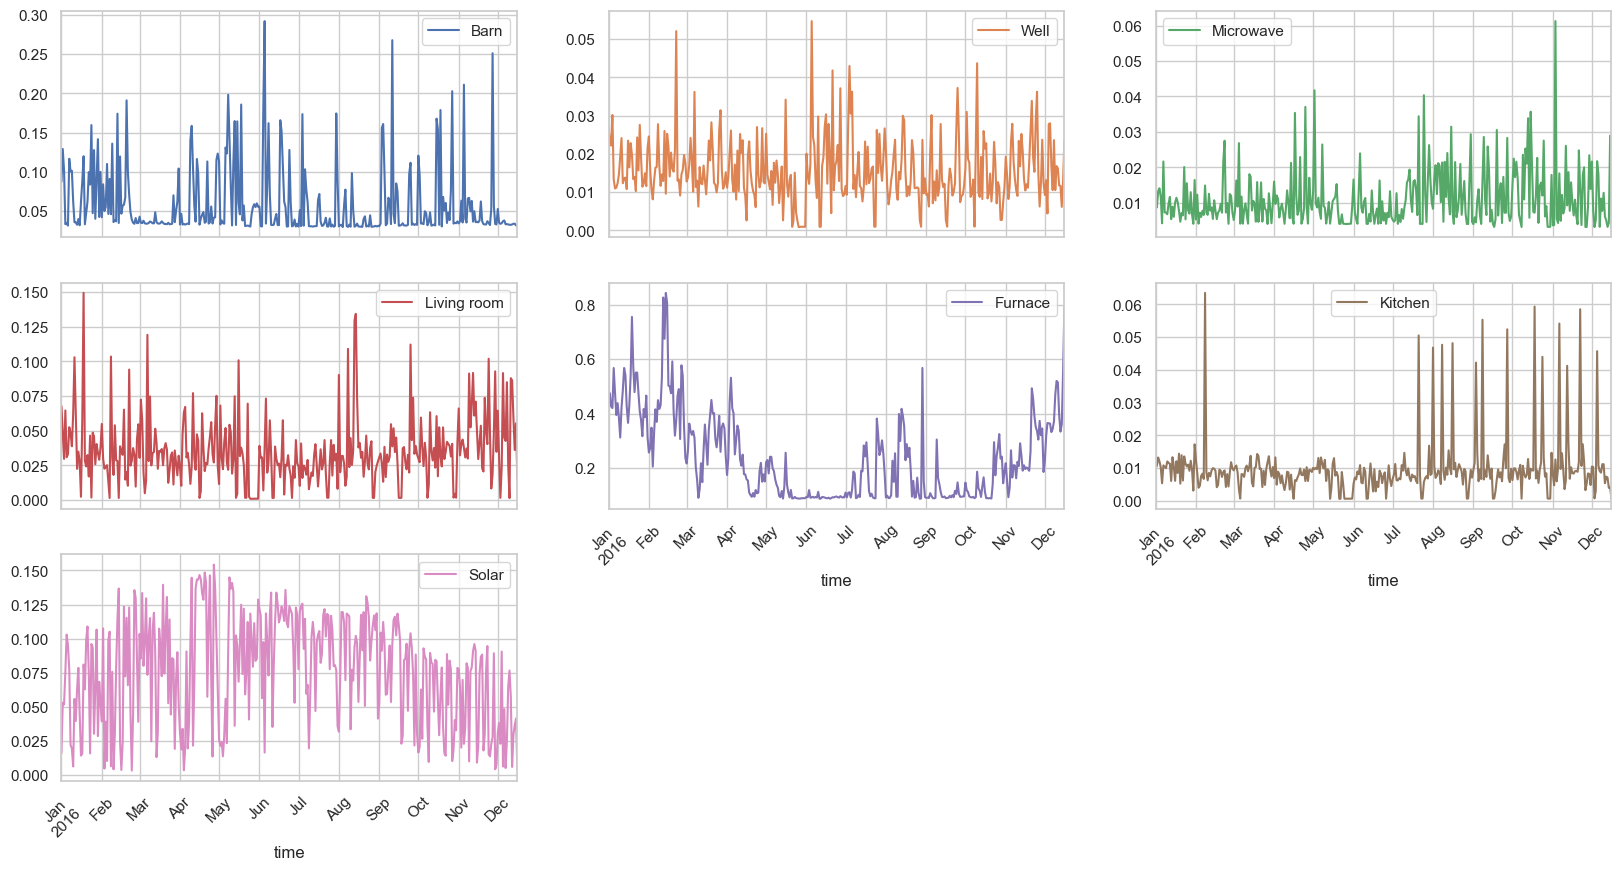

In [44]:
# Visualiser les moyennes journalières avec des sous-graphiques
energy_data_2.plot(
    subplots=True,        # Créer un sous-graphe pour chaque colonne
    layout=(-1, 3),       # Disposition automatique sur plusieurs lignes et 3 colonnes
    figsize=(20, 10),     # Taille de la figure (plus grande pour 7 colonnes)
    grid=True,            # Ajouter une grille pour une meilleure lisibilité
    rot=45,               # Rotation des labels de l'axe des x pour éviter le chevauchement
    xlabel=None           # Enlever les labels sur l'axe des x pour éviter la surcharge
)

# Ajouter un titre global
plt.suptitle('', fontsize=16)
plt.show()


3. Sélection et visualisation des données météorologiques

In [45]:
# Sélectionner les colonnes météorologiques (après la colonne 13)
weather_columns = data.columns[:11].tolist()


In [46]:
# Calculer la moyenne quotidienne des colonnes météorologiques
weather_data = data[weather_columns].resample('D').mean()


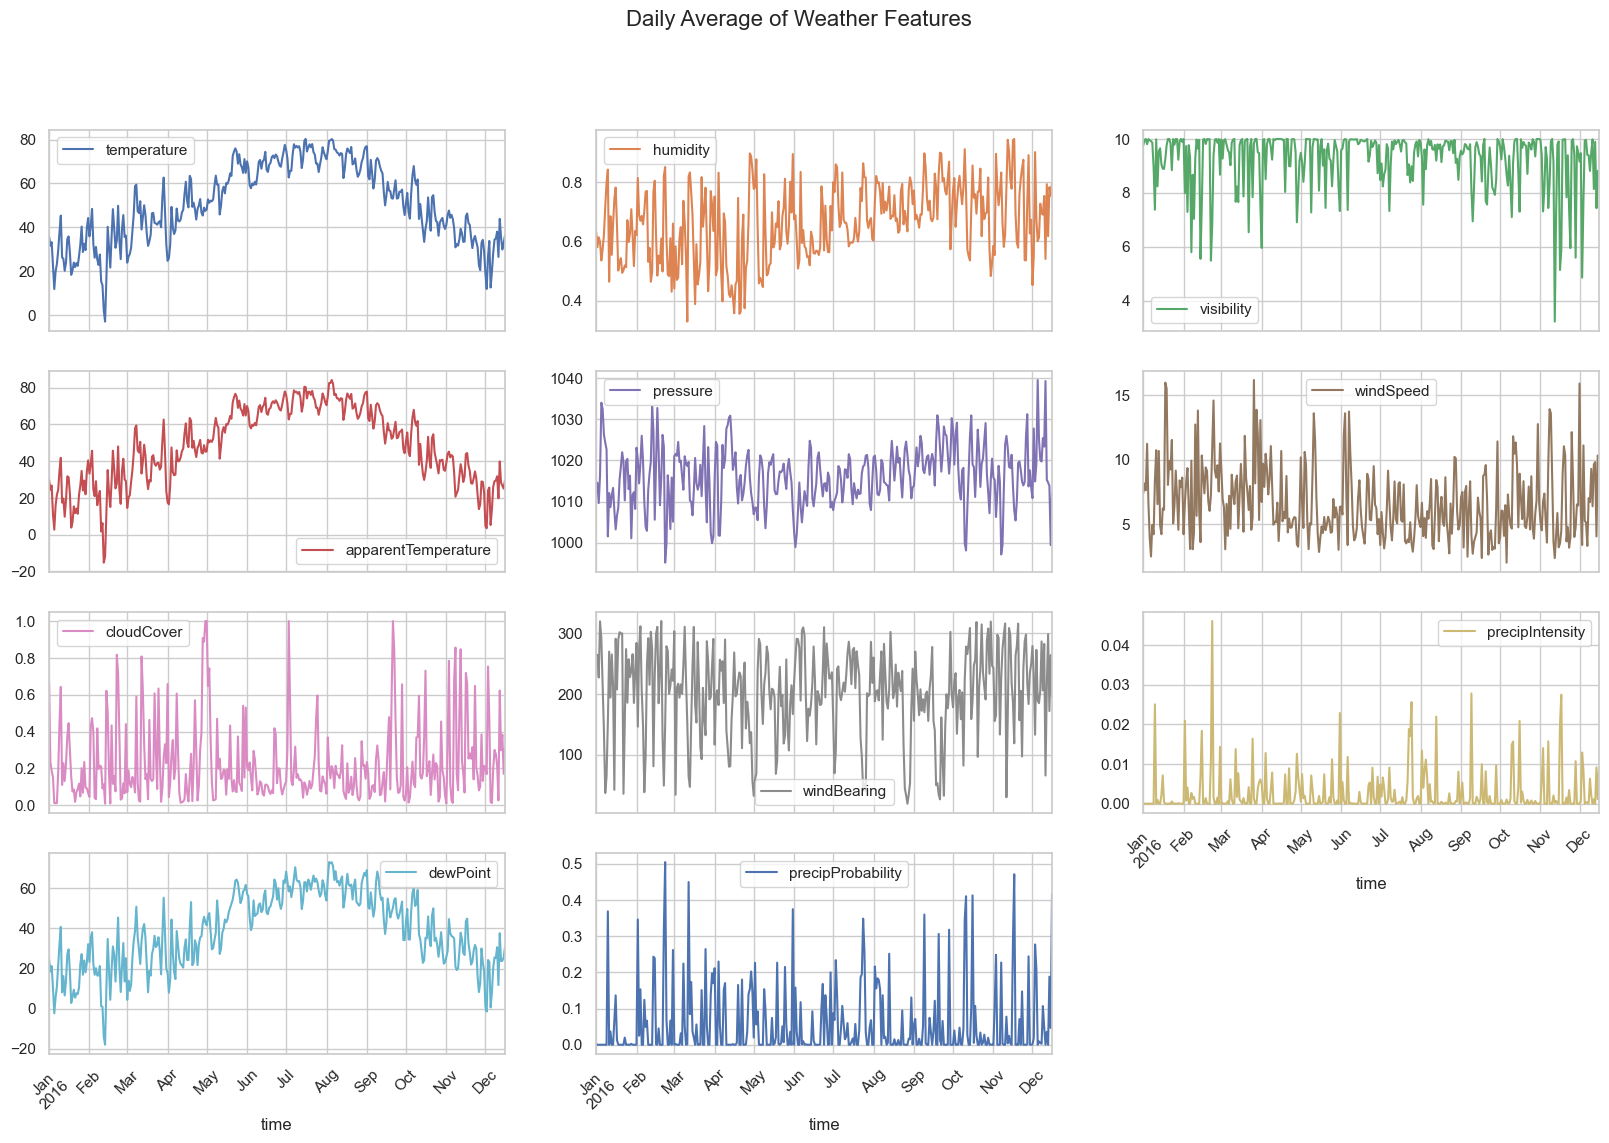

In [47]:
# Visualiser les moyennes journalières des colonnes météorologiques
weather_data.plot(
    subplots=True,        # Chaque colonne a son propre sous-graphe
    layout=(-1, 3),       # Organisation automatique sur plusieurs lignes et 3 colonnes
    figsize=(20, 12),     # Taille de la figure pour afficher correctement les données
    grid=True,            # Ajouter une grille pour une meilleure lisibilité
    rot=45,               # Rotation des labels de l'axe des x pour éviter le chevauchement
    xlabel=None           # Supprimer les labels de l'axe des x
)

# Ajouter un titre global
plt.suptitle('Daily Average of Weather Features', fontsize=16)
plt.show()


Ces analyses montrent l’importance de relier les tendances énergétiques aux conditions environnementales et aux habitudes humaines pour une gestion énergétique efficace. La visualisation des données est essentielle pour identifier les corrélations et guider les décisions, comme l’amélioration de l'efficacité énergétique ou l'optimisation de l'utilisation des ressources renouvelables.

In [48]:
# Ajout des colonnes temporelles
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.weekday  # 0 = Lundi, 6 = Dimanche
data['hour'] = data.index.hour
data['minute'] = data.index.minute


In [ ]:
# Affichage des deux premières lignes
data.head(2)

temperature  humidity  visibility  apparentTemperature  \
time                                                                          
2016-01-01 05:00:00        36.14      0.62        10.0                29.26   
2016-01-01 05:01:00        36.14      0.62        10.0                29.26   

                     pressure  windSpeed  cloudCover  windBearing  \
time                                                                
2016-01-01 05:00:00   1016.91       9.18         NaN          282   
2016-01-01 05:01:00   1016.91       9.18         NaN          282   

                     precipIntensity  dewPoint  precipProbability       use  \
time                                                                          
2016-01-01 05:00:00              0.0      24.4                0.0  0.932833   
2016-01-01 05:01:00              0.0      24.4                0.0  0.934333   

                          gen  House overall  Dishwasher  Home office  \
time                                                                    
2016-01-01 05:00:00  0.003483       0.932833    0.000033     0.442633   
2016-01-01 05:01:00  0.003467       0.934333    0.000000     0.444067   

                      Fridge    Cellar  Garage door     Barn      Well  \
time                                                                     
2016-01-01 05:00:00  0.12415  0.006983     0.013083  0.03135  0.001017   
2016-01-01 05:01:00  0.12400  0.006983     0.013117  0.03150  0.001017   

                     Microwave  Living room   Furnace   Kitchen     Solar  \
time                                                                        
2016-01-01 05:00:00   0.004067     0.001517  0.082617  0.000567  0.003483   
2016-01-01 05:01:00   0.004067     0.001650  0.084533  0.000567  0.003467   

                     Tdiff  month  day  weekday  hour  minute  
time                                                           
2016-01-01 05:00:00  -6.88      1    1        4     5       0  
2016-01-01 05:01:00  -6.88      1    1        4     5       1

In [50]:
# Groupement par mois et calcul des moyennes
mean_month = data.groupby('month').agg({i: 'mean' for i in data.columns[:-5].tolist()})
mean_month

temperature  humidity  visibility  apparentTemperature     pressure  \
month                                                                        
1        28.721361  0.613710    9.559480            21.936788  1014.734906   
2        30.472338  0.629494    8.879972            24.402707  1015.539682   
3        42.423383  0.604991    9.303026            38.659915  1015.347720   
4        46.511224  0.563499    9.422545            44.138112  1017.783030   
5        61.404635  0.643916    9.258774            60.896595  1014.606823   
6        68.045112  0.612218    9.732754            67.957709  1012.371469   
7        73.177993  0.696165    9.333670            73.410978  1014.605433   
8        72.559623  0.723127    9.536122            73.161520  1017.272297   
9        59.957233  0.752322    9.070280            59.740369  1021.648623   
10       47.924530  0.714952    9.388067            45.642883  1017.938381   
11       36.551931  0.741824    8.477862            32.266059  1015.419670   
12       28.672527  0.677562    8.830348            22.317848  1020.508144   

       windSpeed  cloudCover  windBearing  precipIntensity   dewPoint  \
month                                                                   
1       7.798259    0.181903   215.971899         0.001184  16.570161   
2       8.045459    0.253789   215.658860         0.004583  18.513562   
3       7.807045    0.238198   197.737321         0.002301  28.377751   
4       6.474715    0.275175   181.232639         0.002456  29.321759   
5       6.109925    0.251004   180.491174         0.002271  47.440098   
6       6.799312    0.144478   228.161898         0.001646  52.621256   
7       5.309842    0.210459   195.483065         0.003497  61.348972   
8       5.813795    0.153068   185.430175         0.002718  62.162344   
9       5.515194    0.236222   166.618079         0.002352  51.041888   
10      6.633387    0.206767   226.901232         0.002131  38.293141   
11      6.448025    0.313277   224.960046         0.003398  28.418674   
12      7.567160    0.274927   218.640624         0.002888  18.815147   

       precipProbability       use       gen  House overall  Dishwasher  \
month                                                                     
1               0.021099  1.043215  0.058560       1.043215    0.036391   
2               0.086681  0.995164  0.064756       0.995164    0.033503   
3               0.067862  0.762251  0.085032       0.762251    0.033748   
4               0.061581  0.686640  0.090128       0.686640    0.033412   
5               0.055289  0.572376  0.082229       0.572376    0.026452   
6               0.037029  0.536419  0.104078       0.536419    0.024817   
7               0.067514  1.168618  0.091684       1.168618    0.029082   
8               0.051892  1.384105  0.093919       1.384105    0.030367   
9               0.051063  0.739711  0.080703       0.739711    0.032604   
10              0.053450  0.677037  0.053743       0.677037    0.029905   
11              0.063861  0.842977  0.052180       0.842977    0.034630   
12              0.066649  0.919904  0.038094       0.919904    0.031988   

       Home office    Fridge    Cellar  Garage door      Barn      Well  \
month                                                                     
1         0.091203  0.054945  0.018962     0.013646  0.074741  0.017278   
2         0.068263  0.053283  0.019935     0.013701  0.067462  0.017746   
3         0.078668  0.053609  0.028416     0.013763  0.040141  0.016394   
4         0.073455  0.056828  0.035844     0.014524  0.060805  0.015240   
5         0.062029  0.059334  0.034979     0.013834  0.074412  0.010102   
6         0.076249  0.069997  0.046390     0.014517  0.071513  0.018814   
7         0.090838  0.079996  0.064901     0.014650  0.050689  0.017062   
8         0.098919  0.084387  0.098504     0.013819  0.037067  0.014236   
9         0.083776  0.074897  0.064516     0.014407  0.061590  0.013571   
10        0.087

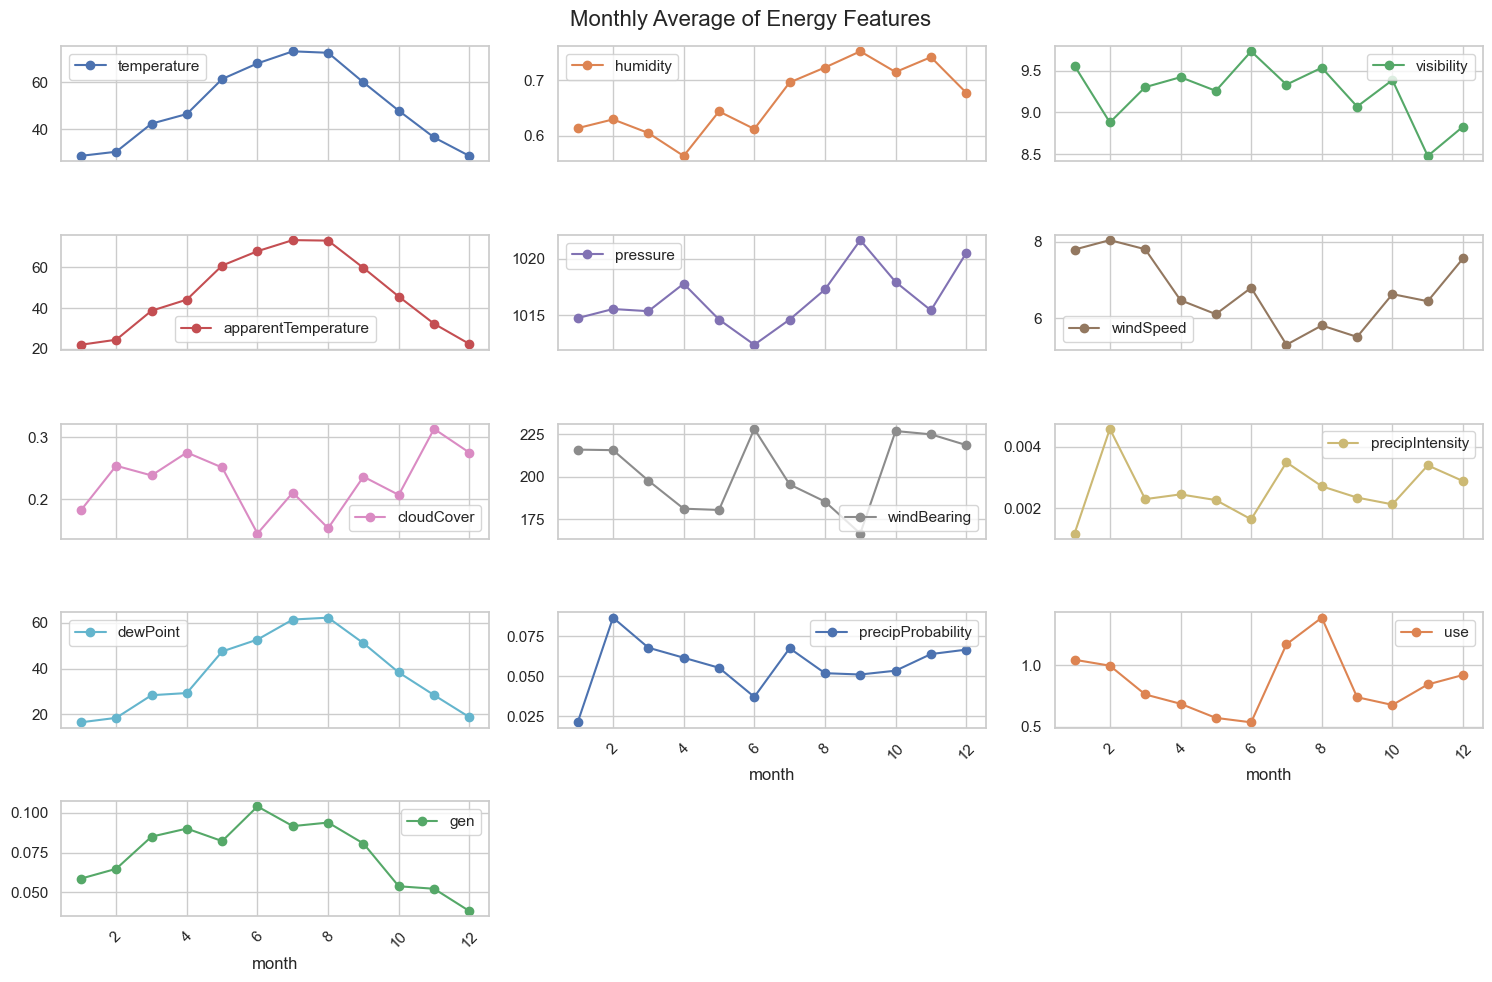

In [51]:
# Tracé des sous-graphiques pour les 13 premières colonnes d'énergie
mean_month[mean_month.columns[0:13].tolist()].plot(
    subplots=True, 
    layout=(-1, 3),  # Organise les sous-graphiques avec 3 colonnes
    figsize=(15, 10), 
    grid=True, 
    rot=45, 
    xlabel=None, 
    marker='o'
)

plt.suptitle('Monthly Average of Energy Features', fontsize=16)
plt.tight_layout()
plt.show()


In [52]:
# Liste des jours de la semaine dans l'ordre souhaité
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [53]:
# Ajout des noms des jours
data['day_name'] = data['weekday'].replace({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Groupement par nom du jour et calcul des moyennes
mean_weekday = data.groupby('day_name').mean()

# Réorganisation dans l'ordre des jours de la semaine
mean_weekday = mean_weekday.reindex(days)


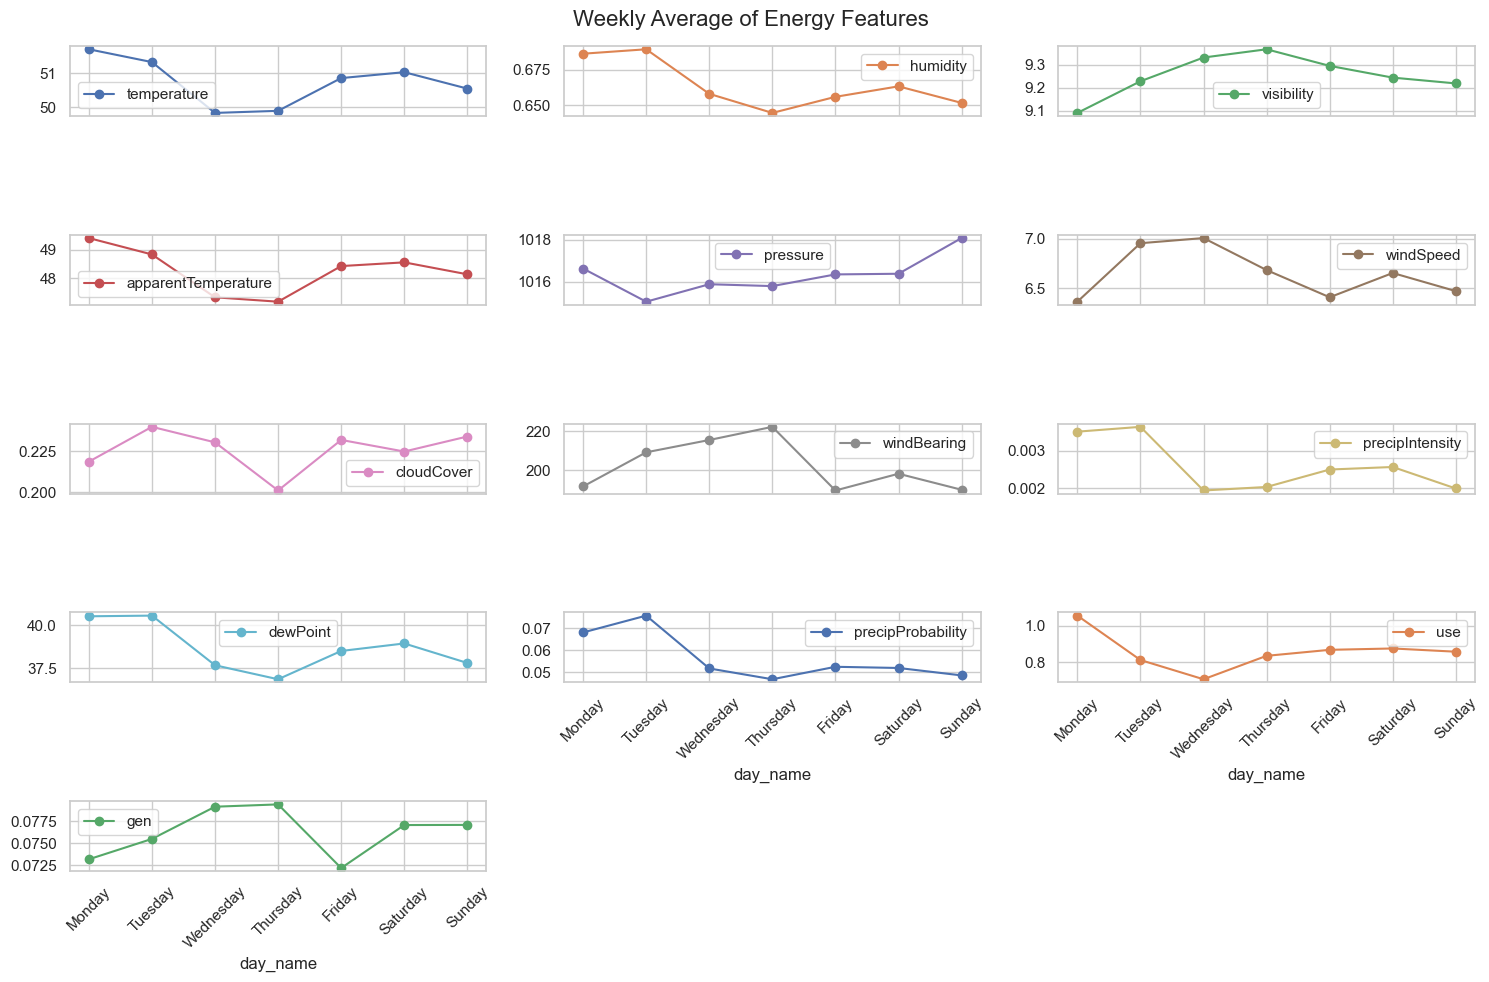

In [54]:
# Tracé des sous-graphiques pour les colonnes d'énergie (premières 13 colonnes)
mean_weekday[mean_weekday.columns[0:13].tolist()].plot(
    subplots=True, 
    layout=(-1, 3), 
    figsize=(15, 10), 
    grid=True, 
    rot=45, 
    xlabel=None, 
    marker='o'
)

plt.suptitle('Weekly Average of Energy Features', fontsize=16)
plt.tight_layout()
plt.show()


In [55]:
# Groupement par heure et calcul des moyennes
mean_hour = data.groupby('hour').agg({i: 'mean' for i in data.columns[:-6].tolist()})
mean_hour

temperature  humidity  visibility  apparentTemperature     pressure  \
hour                                                                        
0       50.996515  0.661120    9.310789            48.609975  1016.349973   
1       51.062692  0.659498    9.300936            48.654618  1016.345524   
2       51.091007  0.657592    9.296532            48.649010  1016.328973   
3       51.129177  0.655948    9.297605            48.663071  1016.318339   
4       51.066740  0.655343    9.307425            48.614630  1016.313524   
5       50.855648  0.658080    9.253994            48.405648  1016.327711   
6       50.704478  0.662038    9.204634            48.222619  1016.325065   
7       50.636640  0.664729    9.192962            48.121230  1016.317664   
8       50.642865  0.665332    9.199405            48.083586  1016.302503   
9       50.663892  0.665200    9.259416            48.029543  1016.284192   
10      50.663479  0.665719    9.257068            48.114895  1016.276463   
11      50.641466  0.666542    9.237695            48.136342  1016.290408   
12      50.598501  0.668788    9.174362            48.088998  1016.304133   
13      50.558883  0.669222    9.195043            48.125843  1016.281398   
14      50.566155  0.668694    9.226740            48.116563  1016.267505   
15      50.562419  0.668425    9.198396            48.117119  1016.257678   
16      50.543959  0.668937    9.163984            48.094108  1016.266278   
17      50.516281  0.669393    9.214158            48.035190  1016.255164   
18      50.518114  0.668387    9.234416            48.136392  1016.246718   
19      50.592922  0.666739    9.255844            48.123413  1016.268165   
20      50.687215  0.664456    9.304906            48.167331  1016.298548   
21      50.742962  0.663396    9.347816            48.254207  1016.321636   
22      50.836564  0.662580    9.327136            48.325513  1016.334646   
23      50.929335  0.661845    9.321619            48.432902  1016.356859   

      windSpeed  cloudCover  windBearing  precipIntensity   dewPoint  \
hour                                                                   
0      6.624074    0.214228   200.687429         0.002455  38.687372   
1      6.721726    0.217751   202.615333         0.002425  38.587225   
2      6.701620    0.213584   199.481333         0.002382  38.490058   
3      6.722775    0.212972   204.734526         0.002172  38.467455   
4      6.759501    0.208853   199.742025         0.002118  38.412409   
5      6.674883    0.219805   204.598333         0.001939  38.374244   
6      6.677101    0.234384   203.354619         0.002207  38.434504   
7      6.700630    0.232060   201.709810         0.003054  38.534478   
8      6.752075    0.233033   202.024333         0.003958  38.641935   
9      6.837230    0.235580   197.026857         0.003416  38.734602   
10     6.736666    0.234170   202.374143         0.002803  38.813340   
11     6.640954    0.239359   206.714571         0.002645  38.843792   
12     6.625849    0.248594   202.424048         0.002346  38.889142   
13     6.556131    0.237339   205.075429         0.002855  38.870932   
14     6.564623    0.232862   207.030476         0.003161  38.856513   
15     6.570197    0.233586   204.599667         0.002587  38.828507   
16     6.563779    0.228788   203.030143         0.003159  38.823130   
17     6.495535    0.230417   201.761286         0.002997  38.797294   
18     6.434363    0.231154   202.250095         0.002480  38.759306   
19     6.482484    0.220389   202.642762         0.002472  38.747498   
20     6.668463    0.222287   200.692333         0.002269  38.757230   
21     6.687519    0.215542   200.862762         0.002072  38.756206   
22     6.707434    0.212333   200.744524         0.002149  38.780467   
23     6.693258    0.212089   200.383333         0.002233  38.767532   

      precipProbability       use       gen  House overall  Dishwasher  \
hour                                                    

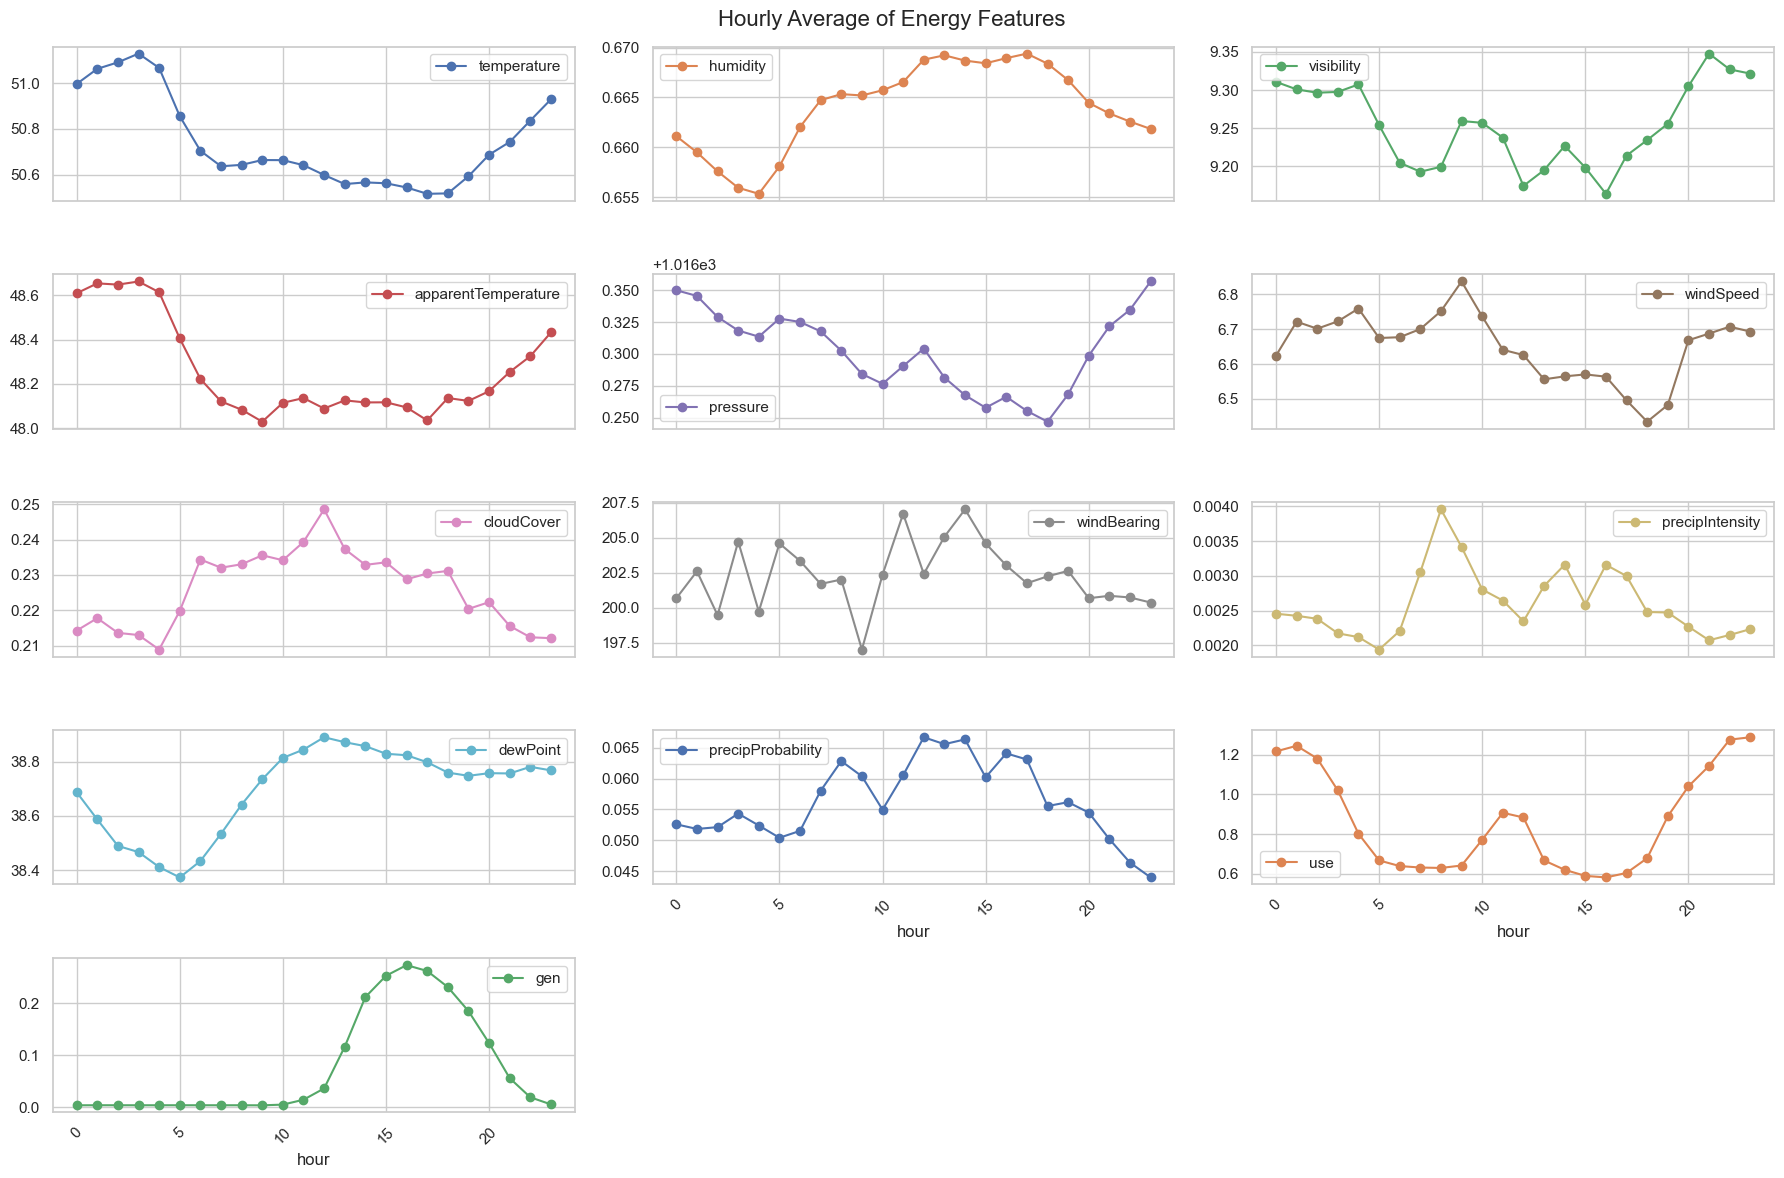

In [56]:
# Tracé des sous-graphiques pour les colonnes d'énergie (premières 13 colonnes)
mean_hour[mean_hour.columns[0:13].tolist()].plot(
    subplots=True, 
    layout=(-1, 3), 
    figsize=(18, 12), 
    grid=True, 
    rot=45, 
    xlabel=None, 
    marker='o'
)

plt.suptitle('Hourly Average of Energy Features', fontsize=16)
plt.tight_layout()
plt.show()


In [57]:
# Liste des colonnes de consommation d'énergie
consumtions = data.columns[0:13].tolist()
print("Colonnes de consommation d'énergie :", consumtions)


Colonnes de consommation d'énergie : ['temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability', 'use', 'gen']


In [58]:
# Liste des colonnes météorologiques
weather = data.columns[13:-5].tolist()
print("Colonnes météorologiques :", weather)


Colonnes météorologiques : ['House overall', 'Dishwasher', 'Home office', 'Fridge', 'Cellar', 'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen', 'Solar', 'Tdiff', 'month']


In [59]:
# Initialisation de la liste
lists = [consumtions]

# Calcul des corrélations
for consumption_col in consumtions:
    correlations = []
    for weather_col in weather:
        corr_value = data[consumption_col].corr(data[weather_col])
        correlations.append(corr_value)
    
    # Ajout des corrélations à la liste 'lists'
    lists.append(correlations)


In [60]:
# Affichage des corrélations calculées
for idx, correlations in enumerate(lists):
    if idx == 0:
        print("Colonnes de consommation :", correlations)
    else:
        print(f"Corrélations pour {consumtions[idx-1]} :", correlations)


Colonnes de consommation : ['temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability', 'use', 'gen']
Corrélations pour temperature : [0.01037861469549466, -0.015715608057542803, 0.011908177666112846, 0.10746619810732565, 0.2891675521275735, 0.013510807137498164, -0.017188235092361056, -0.004690843174320878, 0.0013685091507644723, -0.04978072220947776, -0.3398454589308043, -0.006106208971570402, 0.09098340829794076, 0.7326925643816634, 0.21768974991661094]
Corrélations pour humidity : [0.011510922753933686, -0.0018681937487375904, -0.00600750880702773, 0.030748719536058563, 0.055540984617439434, -0.007399315907505872, -0.0021412581768590986, -0.006590374478223446, 0.0125410739559027, 0.0031888107431275662, -0.055171647118576486, 0.010423169867772737, 0.007607779182749533, 0.18844103079818758, 0.24677122860113332]
Corrélations pour visibility : [-0.0026086319949744263, -0.008064

In [61]:
# Création d'un DataFrame pour stocker les corrélations
correlation_matrix = pd.DataFrame(index=consumtions, columns=weather)

# Calcul des corrélations entre chaque colonne de consommation et chaque colonne météo
for consumption_col in consumtions:
    for weather_col in weather:
        correlation_matrix.loc[consumption_col, weather_col] = data[consumption_col].corr(data[weather_col])

# Conversion en type float pour la heatmap
correlation_matrix = correlation_matrix.astype(float)


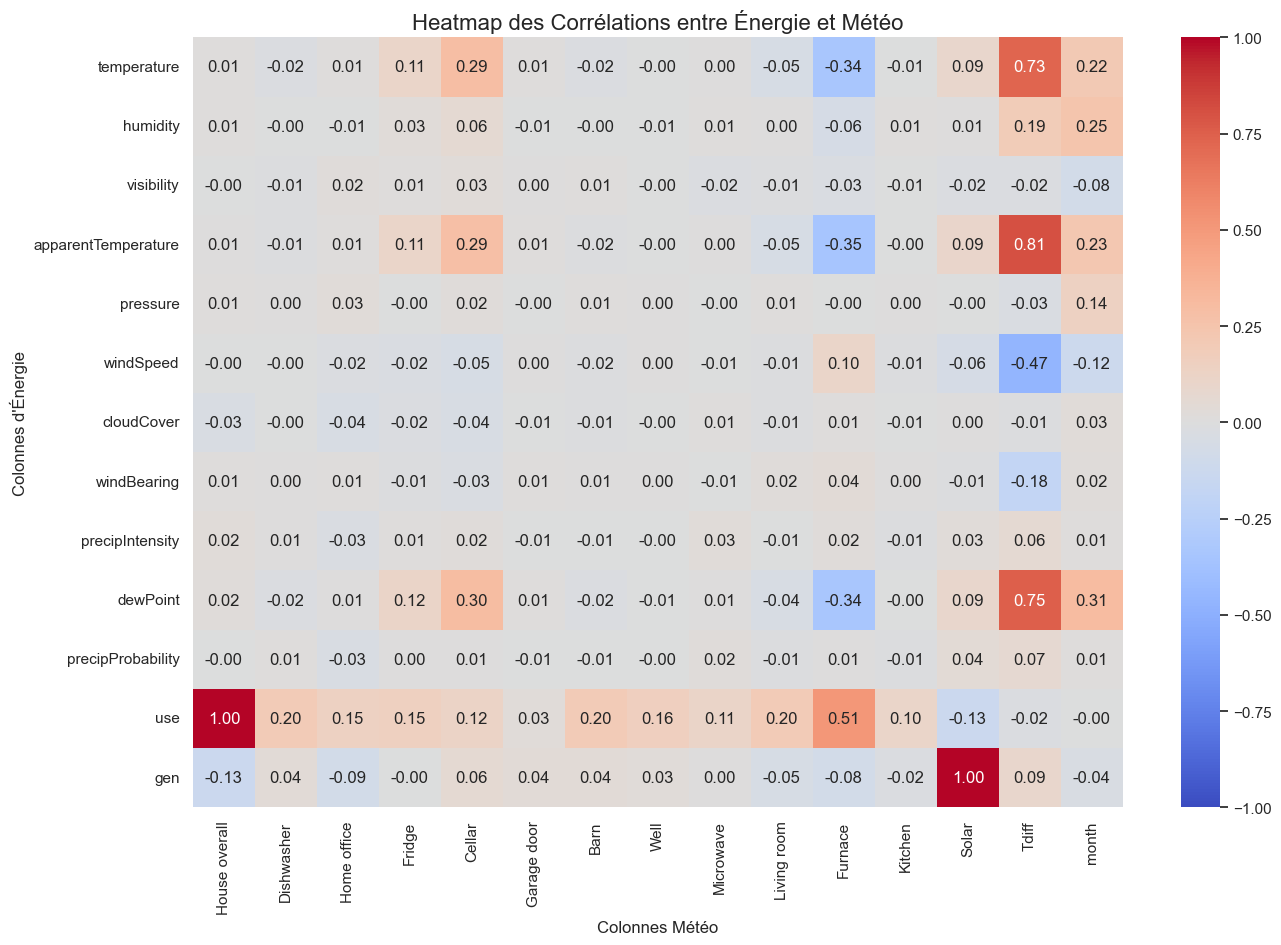

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracé de la heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap des Corrélations entre Énergie et Météo', fontsize=16)
plt.xlabel('Colonnes Météo')
plt.ylabel('Colonnes d\'Énergie')
plt.show()


In [63]:
# Création du DataFrame à partir des corrélations stockées dans 'lists'
dataframe_corr = pd.DataFrame(lists[1:], index=consumtions, columns=weather)

# Conversion des valeurs en type float
dataframe_corr = dataframe_corr.astype(float)

# Affichage du DataFrame des corrélations
dataframe_corr.head()


House overall  Dishwasher  Home office    Fridge  \
temperature               0.010379   -0.015716     0.011908  0.107466   
humidity                  0.011511   -0.001868    -0.006008  0.030749   
visibility               -0.002609   -0.008064     0.020638  0.009019   
apparentTemperature       0.005560   -0.014547     0.010856  0.107064   
pressure                  0.010730    0.000211     0.027091 -0.000517   

                       Cellar  Garage door      Barn      Well  Microwave  \
temperature          0.289168     0.013511 -0.017188 -0.004691   0.001369   
humidity             0.055541    -0.007399 -0.002141 -0.006590   0.012541   
visibility           0.030095     0.002262  0.008376 -0.001069  -0.018359   
apparentTemperature  0.288882     0.013578 -0.015189 -0.004741   0.002265   
pressure             0.018494    -0.000276  0.011716  0.002994  -0.001248   

                     Living room   Furnace   Kitchen     Solar     Tdiff  \
temperature            -0.049781 -0.339845 -0.006106  0.090983  0.732693   
humidity                0.003189 -0.055172  0.010423  0.007608  0.188441   
visibility             -0.014494 -0.029998 -0.005027 -0.017650 -0.018984   
apparentTemperature    -0.048981 -0.348868 -0.004344  0.093793  0.807018   
pressure                0.013774 -0.001174  0.003483 -0.000222 -0.029497   

                        month  
temperature          0.217690  
humidity             0.246771  
visibility          -0.081911  
apparentTemperature  0.228418  
pressure             0.144357

In [64]:
# Application du style sur les cellules du DataFrame
styled_corr = correlation_matrix.style.applymap(
    lambda x: 'background-color: red' if x > 0.1 else (
            'background-color: orange' if x < -0.1 else 'background-color: white')
)

# Affichage du DataFrame stylisé
styled_corr


In [65]:
data['Sum_usage'] = data[list(data.columns[1:12])].sum(axis=1)
data.head()

temperature  humidity  visibility  apparentTemperature  \
time                                                                          
2016-01-01 05:00:00        36.14      0.62        10.0                29.26   
2016-01-01 05:01:00        36.14      0.62        10.0                29.26   
2016-01-01 05:02:00        36.14      0.62        10.0                29.26   
2016-01-01 05:03:00        36.14      0.62        10.0                29.26   
2016-01-01 05:04:00        36.14      0.62        10.0                29.26   

                     pressure  windSpeed  cloudCover  windBearing  \
time                                                                
2016-01-01 05:00:00   1016.91       9.18         NaN          282   
2016-01-01 05:01:00   1016.91       9.18         NaN          282   
2016-01-01 05:02:00   1016.91       9.18         NaN          282   
2016-01-01 05:03:00   1016.91       9.18         NaN          282   
2016-01-01 05:04:00   1016.91       9.18         NaN          282   

                     precipIntensity  dewPoint  precipProbability       use  \
time                                                                          
2016-01-01 05:00:00              0.0      24.4                0.0  0.932833   
2016-01-01 05:01:00              0.0      24.4                0.0  0.934333   
2016-01-01 05:02:00              0.0      24.4                0.0  0.931817   
2016-01-01 05:03:00              0.0      24.4                0.0  1.022050   
2016-01-01 05:04:00              0.0      24.4                0.0  1.139400   

                          gen  House overall  Dishwasher  Home office  \
time                                                                    
2016-01-01 05:00:00  0.003483       0.932833    0.000033     0.442633   
2016-01-01 05:01:00  0.003467       0.934333    0.000000     0.444067   
2016-01-01 05:02:00  0.003467       0.931817    0.000017     0.446067   
2016-01-01 05:03:00  0.003483       1.022050    0.000017     0.446583   
2016-01-01 05:04:00  0.003467       1.139400    0.000133     0.446533   

                       Fridge    Cellar  Garage door      Barn      Well  \
time                                                                       
2016-01-01 05:00:00  0.124150  0.006983     0.013083  0.031350  0.001017   
2016-01-01 05:01:00  0.124000  0.006983     0.013117  0.031500  0.001017   
2016-01-01 05:02:00  0.123533  0.006983     0.013083  0.031517  0.001000   
2016-01-01 05:03:00  0.123133  0.006983     0.013000  0.031500  0.001017   
2016-01-01 05:04:00  0.122850  0.006850     0.012783  0.031500  0.001017   

                     Microwave  Living room   Furnace   Kitchen     Solar  \
time                                                                        
2016-01-01 05:00:00   0.004067     0.001517  0.082617  0.000567  0.003483   
2016-01-01 05:01:00   0.004067     0.001650  0.084533  0.000567  0.003467   
2016-01-01 05:02:00   0.004067     0.001650  0.083017  0.000617  0.003467   
2016-01-01 05:03:00   0.004067     0.001617  0.175417  0.000650  0.003483   
2016-01-01 05:04:00   0.004067     0.001583  0.300917  0.000783  0.003467   

                     Tdiff  month  day  weekday  hour  minute day_name  \
time                                                                     
2016-01-01 05:00:00  -6.88      1    1        4     5       0   Friday   
2016-01-01 05:01:00  -6.88      1    1        4     5       1   Friday   
2016-01-01 05:02:00  -6.88      1    1        4     5       2   Friday   
2016-01-01 05:03:00  -6.88      1    1        4     5       3   Friday   
2016-01-01 05:04:00  -6.88      1    1        4     5       4   Friday   

                       Sum_usage  
time                              
2016-01-01 05:00:00  1373.302833  
2016-01-01 05:01:00  1373.304333  
2016-01-01 05:02:00  1373.301817  
2016-01-01 05:03:00  1373.392050  
2016-01-01 05:04:00  1373.509400

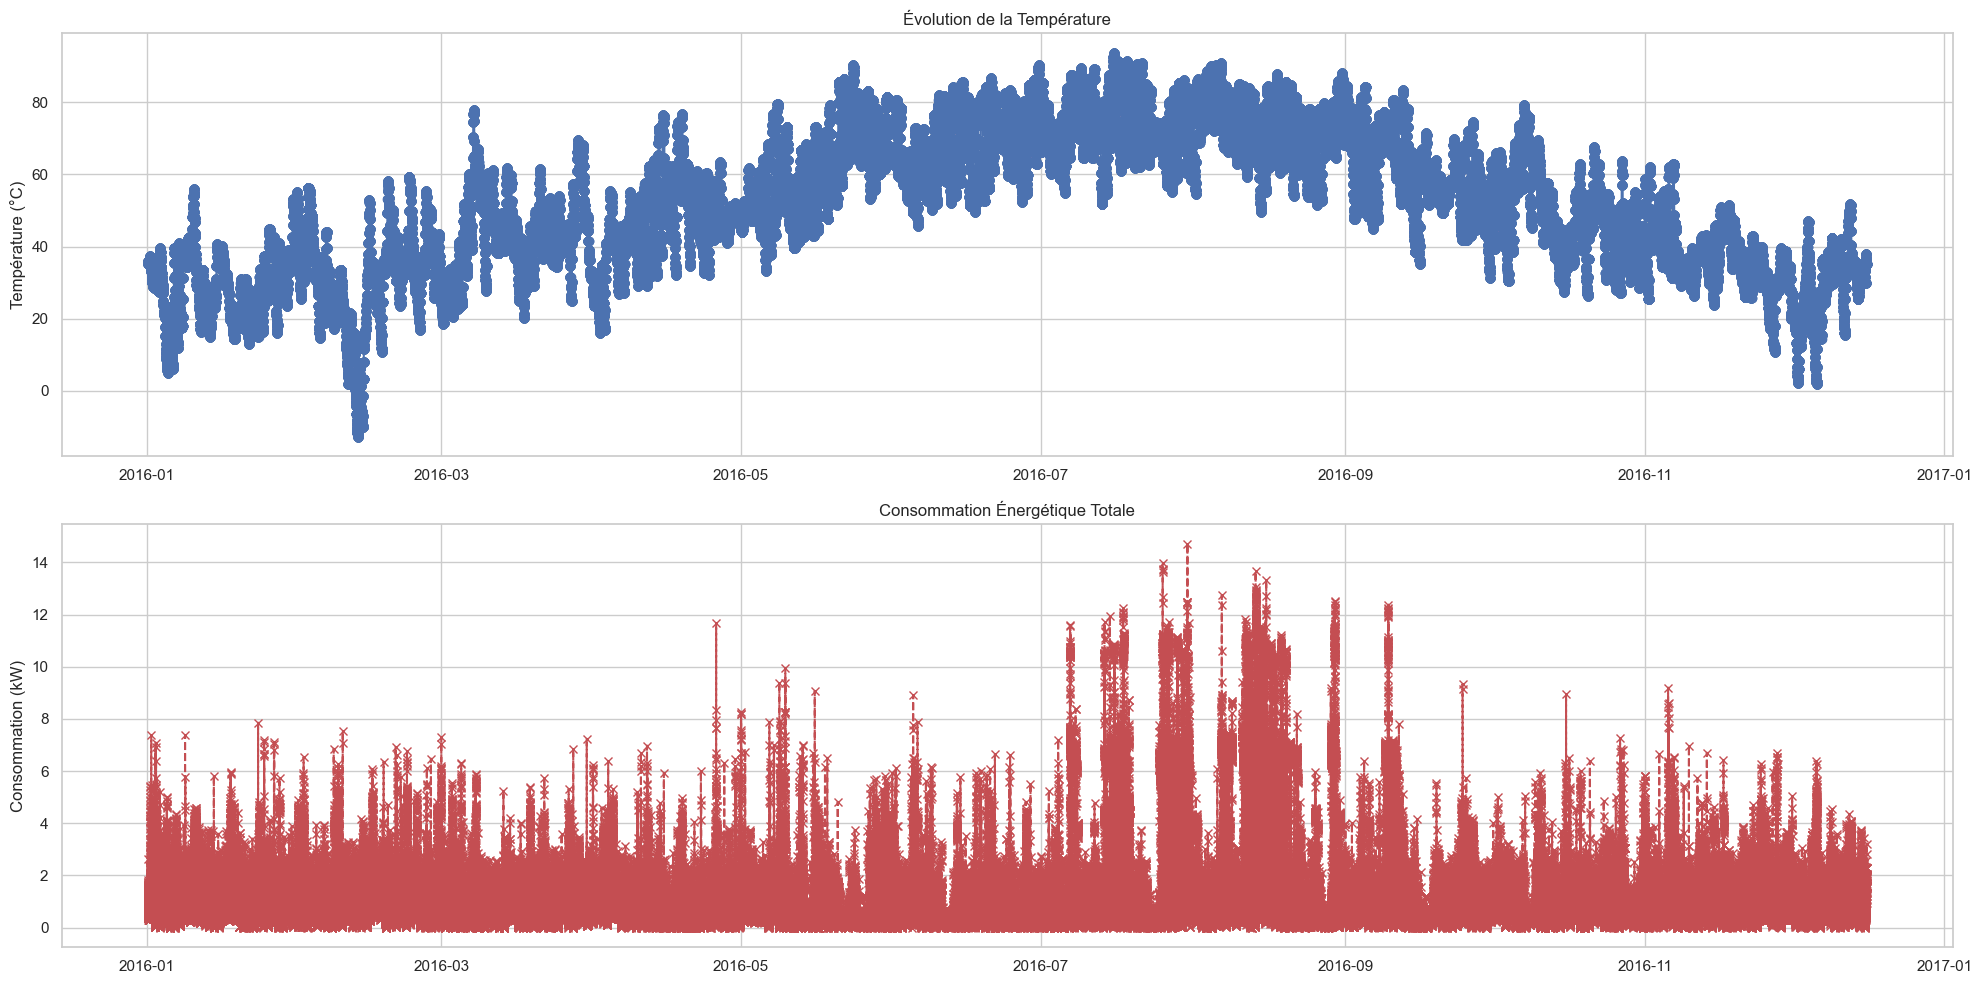

In [66]:
import matplotlib.pyplot as plt

# Création de la figure avec deux sous-graphiques
fig, axes = plt.subplots(2, 1, figsize=(20, 10))  # 2 lignes, 1 colonne

# Exemple de tracé dans chaque sous-graphe
axes[0].plot(data.index, data['temperature'], marker='o', linestyle='-', color='b')
axes[0].set_title('Évolution de la Température')
axes[0].set_ylabel('Température (°C)')

axes[1].plot(data.index, data['use'], marker='x', linestyle='--', color='r')
axes[1].set_title('Consommation Énergétique Totale')
axes[1].set_ylabel('Consommation (kW)')

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


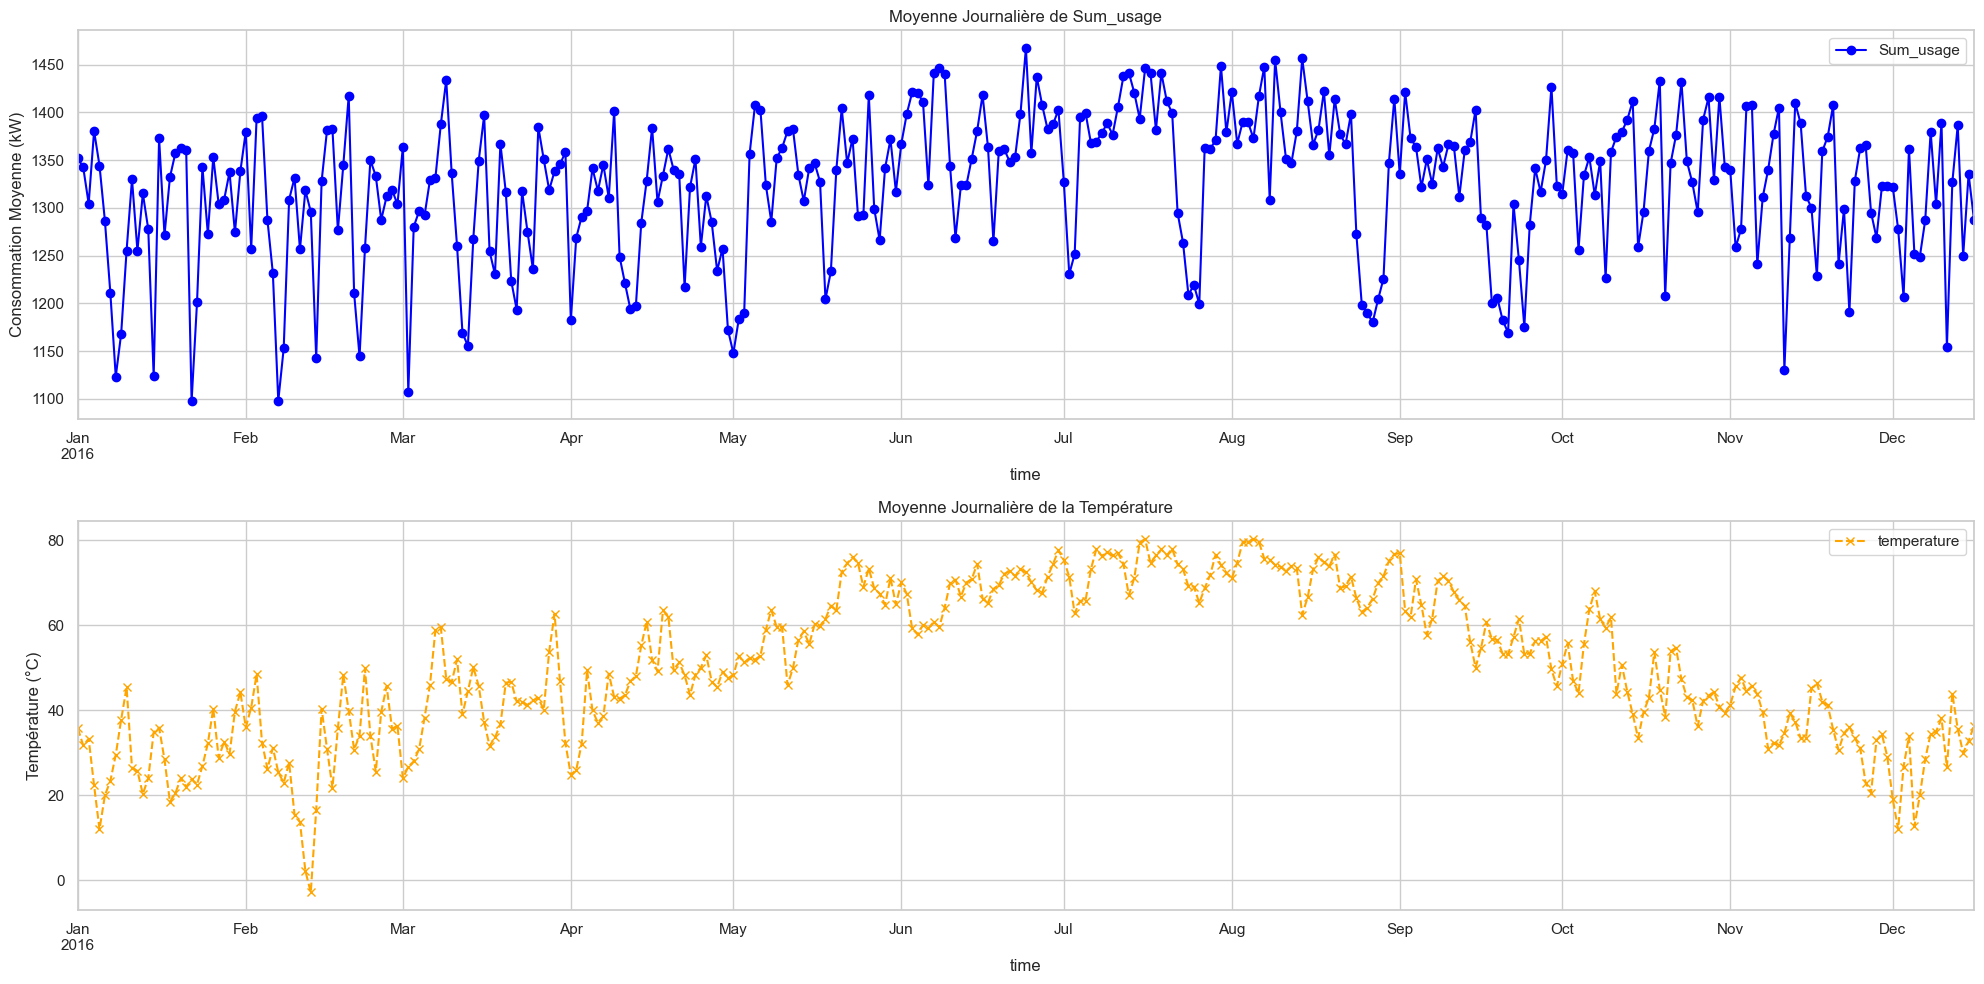

In [67]:
# Création de la figure avec deux sous-graphiques
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# Tracé de la moyenne journalière de 'Sum_usage' dans le premier sous-graphe
data['Sum_usage'].resample('D').mean().plot(
    ax=axes[0], 
    grid=True, 
    legend=True, 
    color='blue', 
    marker='o', 
    linestyle='-'
)

# Configuration du premier sous-graphe
axes[0].set_title('Moyenne Journalière de Sum_usage')
axes[0].set_ylabel('Consommation Moyenne (kW)')

# Exemple pour le second sous-graphe (vous pouvez le remplacer par une autre analyse)
data['temperature'].resample('D').mean().plot(
    ax=axes[1], 
    grid=True, 
    legend=True, 
    color='orange', 
    marker='x', 
    linestyle='--'
)
axes[1].set_title('Moyenne Journalière de la Température')
axes[1].set_ylabel('Température (°C)')

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


In [68]:
# Exemple de création de la colonne Usage_diff comme différence entre Sum_usage et une autre colonne
data['Usage_diff'] = data['Sum_usage'] - data['House overall']


In [69]:
data.columns

Index(['temperature', 'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'use', 'gen', 'House overall',
       'Dishwasher', 'Home office', 'Fridge', 'Cellar', 'Garage door', 'Barn',
       'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen', 'Solar',
       'Tdiff', 'month', 'day', 'weekday', 'hour', 'minute', 'day_name',
       'Sum_usage', 'Usage_diff'],
      dtype='object')

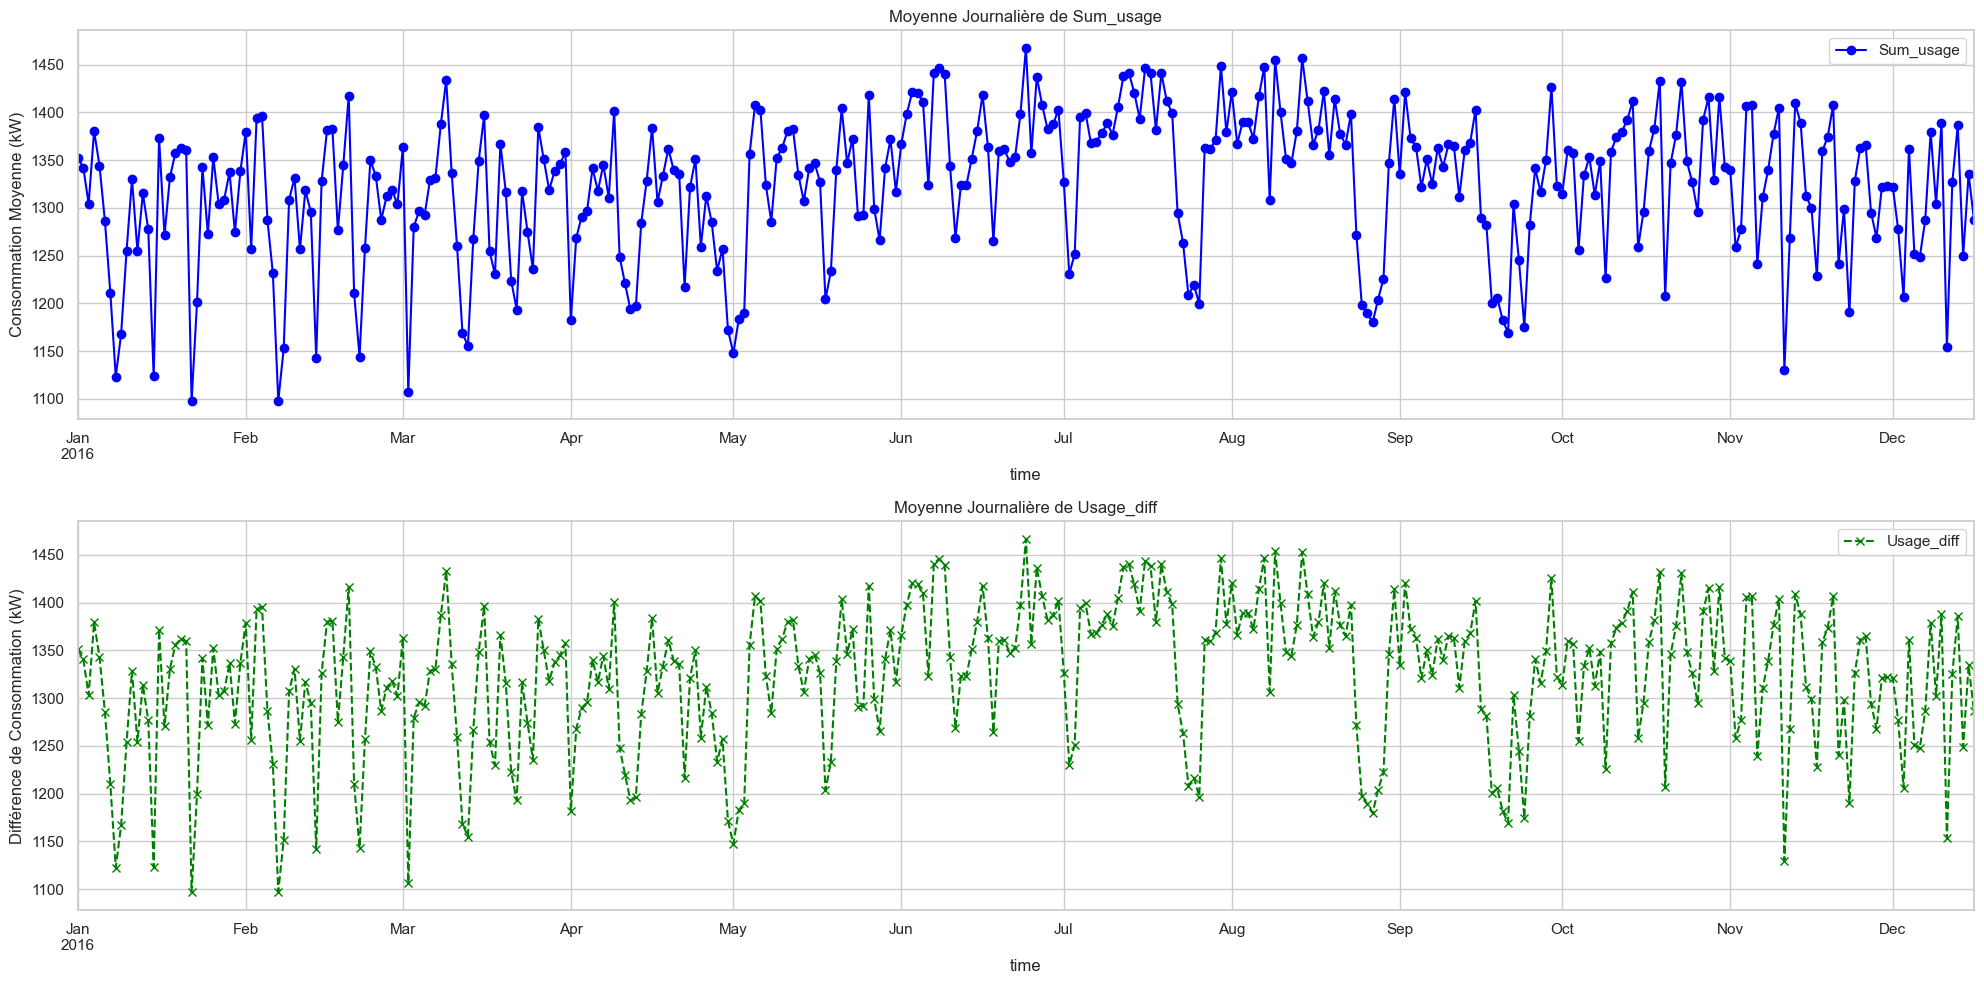

In [70]:
# Création de la figure avec deux sous-graphiques
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# Tracé de la moyenne journalière de 'Sum_usage' dans le premier sous-graphe
data['Sum_usage'].resample('D').mean().plot(
    ax=axes[0], 
    grid=True, 
    legend=True, 
    color='blue', 
    marker='o', 
    linestyle='-'
)
axes[0].set_title('Moyenne Journalière de Sum_usage')
axes[0].set_ylabel('Consommation Moyenne (kW)')

# Tracé de la moyenne journalière de 'Usage_diff' dans le second sous-graphe
data['Usage_diff'].resample('D').mean().plot(
    ax=axes[1], 
    grid=True, 
    legend=True, 
    color='green', 
    marker='x', 
    linestyle='--'
)
axes[1].set_title('Moyenne Journalière de Usage_diff')
axes[1].set_ylabel('Différence de Consommation (kW)')

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


In [71]:
# Échantillonnage des données par jour et calcul des moyennes quotidiennes
data_daily = data['House overall'].resample('D').mean()

# Afficher les premières lignes de 'data_daily' pour vérifier
data_daily.head()


time
2016-01-01    1.198482
2016-01-02    1.285779
2016-01-03    1.146617
2016-01-04    1.042143
2016-01-05    1.109701
Freq: D, Name: House overall, dtype: float64

In [72]:
# Calcul de la moyenne mobile sur une fenêtre de 10 jours
baseline = data_daily.rolling(window=10).mean()

# Affichage des premières lignes de 'baseline' pour vérifier
baseline.head(20)


time
2016-01-01         NaN
2016-01-02         NaN
2016-01-03         NaN
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-09         NaN
2016-01-10    1.077051
2016-01-11    1.068014
2016-01-12    1.048206
2016-01-13    1.039328
2016-01-14    1.032359
2016-01-15    1.006356
2016-01-16    1.019483
2016-01-17    1.034183
2016-01-18    1.080060
2016-01-19    1.123348
2016-01-20    1.104325
Freq: D, Name: House overall, dtype: float64

In [73]:
# Remplir les NaN avec la première valeur disponible
baseline = baseline.fillna(method='bfill')

# Afficher les premières lignes de baseline après le remplissage
baseline.head(20)


time
2016-01-01    1.077051
2016-01-02    1.077051
2016-01-03    1.077051
2016-01-04    1.077051
2016-01-05    1.077051
2016-01-06    1.077051
2016-01-07    1.077051
2016-01-08    1.077051
2016-01-09    1.077051
2016-01-10    1.077051
2016-01-11    1.068014
2016-01-12    1.048206
2016-01-13    1.039328
2016-01-14    1.032359
2016-01-15    1.006356
2016-01-16    1.019483
2016-01-17    1.034183
2016-01-18    1.080060
2016-01-19    1.123348
2016-01-20    1.104325
Freq: D, Name: House overall, dtype: float64

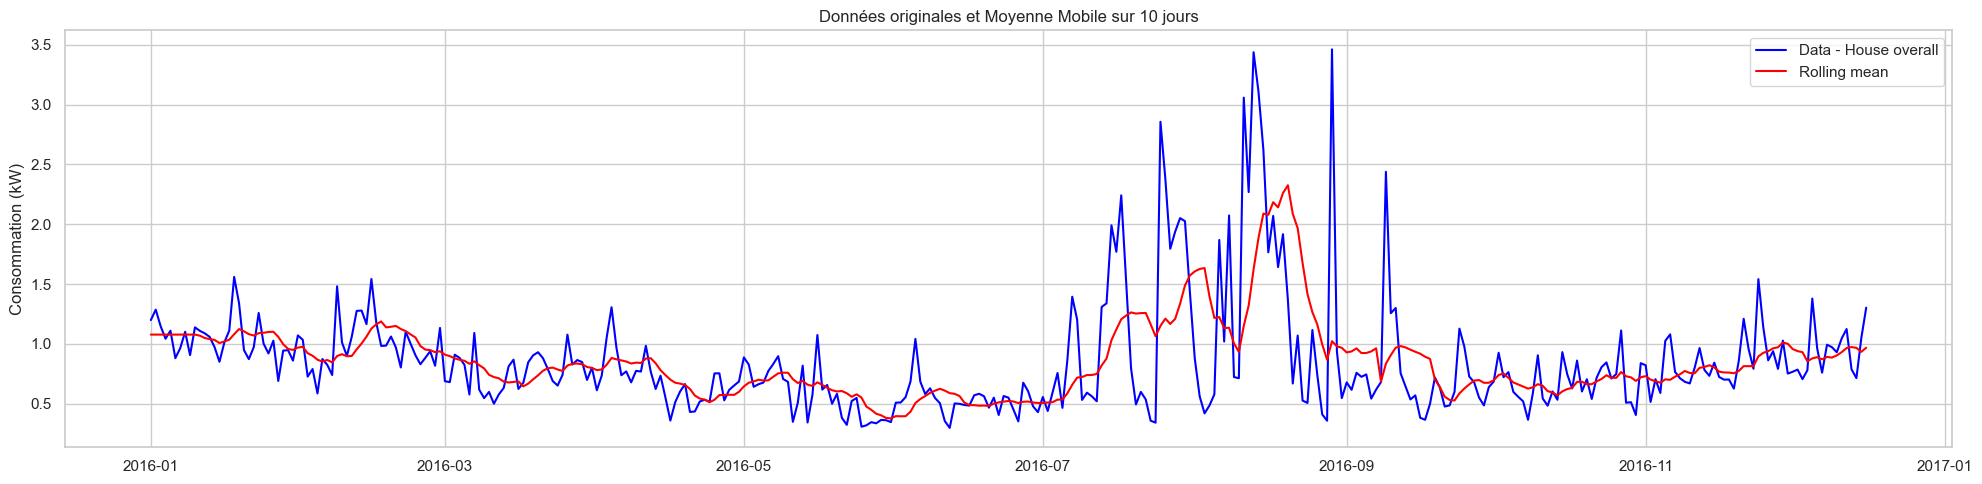

In [74]:
import matplotlib.pyplot as plt

# Création de la figure avec une taille personnalisée
plt.figure(figsize=(20, 5))  # Taille de la figure en pouces (largeur, hauteur)

# Tracer les courbes des données originales et de la moyenne mobile
plt.plot(data_daily, c='blue', label='Data - House overall')  # Données originales en bleu
plt.plot(baseline, c='red', label='Rolling mean')  # Moyenne mobile en rouge

# Ajouter un titre
plt.title('Données originales et Moyenne Mobile sur 10 jours')

# Ajouter un label pour l'axe Y
plt.ylabel('Consommation (kW)')

# Ajouter une légende pour distinguer les courbes
plt.legend()

# Ajuster les marges pour éviter les chevauchements
plt.tight_layout()

# Activer la grille pour une meilleure lisibilité
plt.grid(True)

# Afficher le graphique
plt.show()


In [75]:
# Calculer la taille de l'ensemble d'entraînement (70% des données)
size = int(len(data_daily) * 0.7)

# Diviser les données en ensemble d'entraînement et ensemble de test
train = data_daily[:size]  # 70% des données pour l'entraînement
test = data_daily[size:]   # 30% des données pour le test

# Afficher les premières lignes de chaque ensemble pour vérifier
train.head()


time
2016-01-01    1.198482
2016-01-02    1.285779
2016-01-03    1.146617
2016-01-04    1.042143
2016-01-05    1.109701
Freq: D, Name: House overall, dtype: float64

In [76]:
test.head()

time
2016-09-02    0.615530
2016-09-03    0.757602
2016-09-04    0.723917
2016-09-05    0.743956
2016-09-06    0.541591
Freq: D, Name: House overall, dtype: float64

In [77]:
# Créer la version tronquée de la moyenne mobile correspondant à la partie test
baseline_test = baseline.loc[test.index[0]:]

# Afficher les premières lignes de baseline_test pour vérifier
baseline_test.head()


time
2016-09-02    0.936677
2016-09-03    0.961894
2016-09-04    0.922736
2016-09-05    0.923104
2016-09-06    0.936226
Freq: D, Name: House overall, dtype: float64

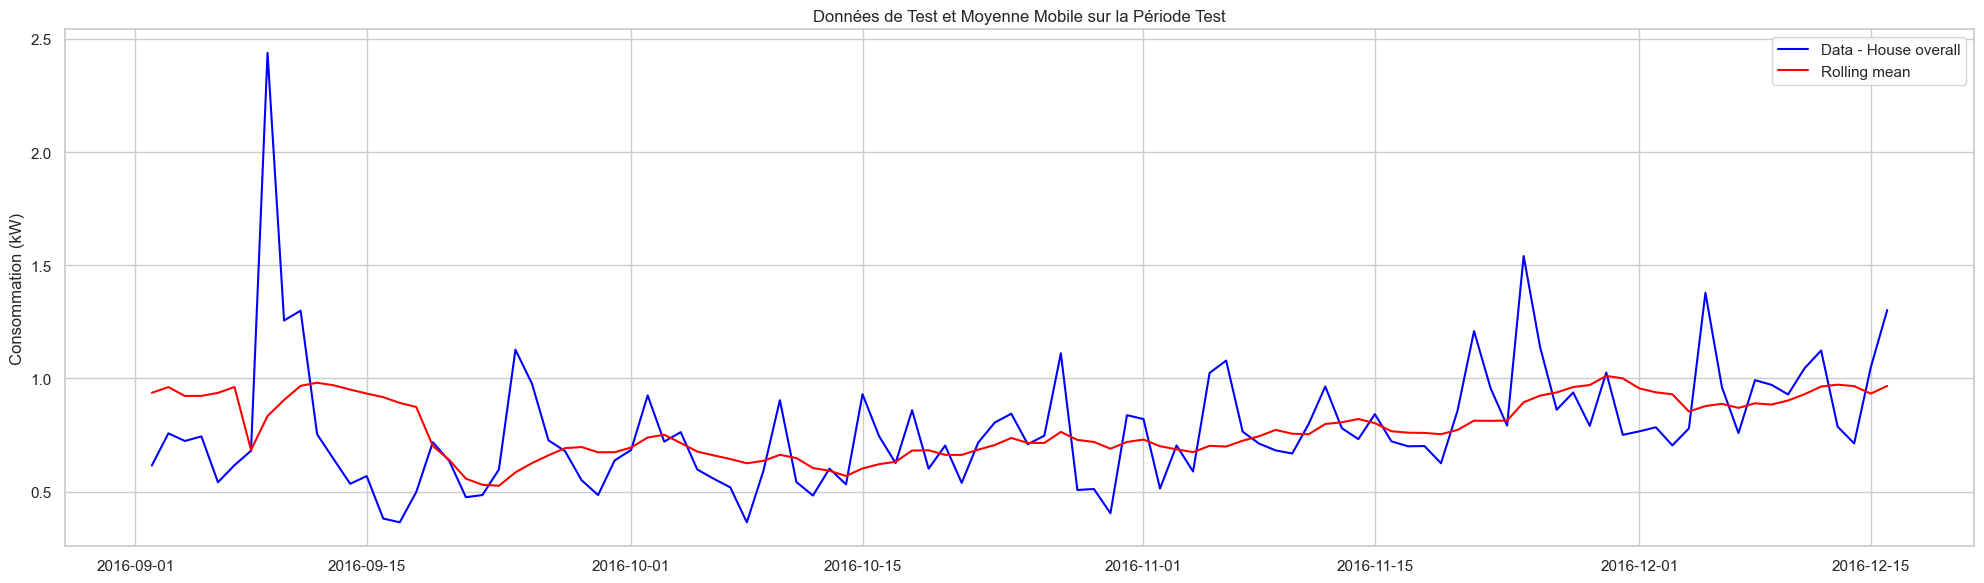

In [78]:
import matplotlib.pyplot as plt

# Créer une figure avec une taille personnalisée
plt.figure(figsize=(20, 6))  # Largeur de 12 pouces et hauteur de 6 pouces

# Tracer les courbes des données de test et de la moyenne mobile
plt.plot(test, c='blue', label='Data - House overall')  # Données de test en bleu
plt.plot(baseline_test, c='red', label='Rolling mean')  # Moyenne mobile tronquée en rouge

# Ajouter un titre
plt.title('Données de Test et Moyenne Mobile sur la Période Test')

# Ajouter un label pour l'axe Y
plt.ylabel('Consommation (kW)')

# Ajouter une légende pour distinguer les courbes
plt.legend()

# Activer la grille pour une meilleure lisibilité
plt.grid(True)

# Ajuster les marges pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()


In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [80]:
# Calcul de l'Erreur quadratique moyenne (MSE)
mse = mean_squared_error(test, baseline_test)

# Calcul de la Racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)

# Calcul de l'Erreur absolue moyenne (MAE)
mae = mean_absolute_error(test, baseline_test)

# Calcul de l'Erreur absolue moyenne en pourcentage (MAPE)
mape = np.mean(np.abs(baseline_test - test) / np.abs(test)) * 100

# Calcul de l'Erreur absolue moyenne normalisée (MASE)
# Calculer la somme des différences absolues sur l'ensemble d'entraînement
train_diff = np.abs(np.diff(train))
mase = np.mean(np.abs(test - baseline_test)) / (train_diff.sum() / (len(train) - 1))

# Calcul du Score R²
r2 = r2_score(test, baseline_test)

# Afficher les résultats des métriques
print(f"Erreur quadratique moyenne (MSE) : {mse:.4f}")
print(f"Racine de l'erreur quadratique moyenne (RMSE) : {rmse:.4f}")
print(f"Erreur absolue moyenne (MAE) : {mae:.4f}")
print(f"Erreur absolue moyenne en pourcentage (MAPE) : {mape:.2f}%")
print(f"Erreur absolue moyenne normalisée (MASE) : {mase:.4f}")
print(f"Score R² : {r2:.4f}")


Erreur quadratique moyenne (MSE) : 0.0707
Racine de l'erreur quadratique moyenne (RMSE) : 0.2659
Erreur absolue moyenne (MAE) : 0.1770
Erreur absolue moyenne en pourcentage (MAPE) : 23.58%
Erreur absolue moyenne normalisée (MASE) : 0.7206
Score R² : 0.0768


In [81]:
# Décaler les données journalières de 1 jour pour créer la prédiction de persistance
baseline = data_daily.shift(1)

# Supprimer les valeurs manquantes générées par le décalage (le premier jour n'a pas de prédiction)
baseline = baseline.dropna()

# Créer une version des données réelles en excluant la première ligne
data_actual = data_daily.iloc[1:]

# Afficher les premières lignes pour vérifier
baseline.head()



time
2016-01-02    1.198482
2016-01-03    1.285779
2016-01-04    1.146617
2016-01-05    1.042143
2016-01-06    1.109701
Freq: D, Name: House overall, dtype: float64

In [82]:
data_actual.head()

time
2016-01-02    1.285779
2016-01-03    1.146617
2016-01-04    1.042143
2016-01-05    1.109701
2016-01-06    0.880044
Freq: D, Name: House overall, dtype: float64

In [83]:
# Calcul de la taille de l'ensemble d'entraînement (70% des données)
size = int(len(data_actual) * 0.7)

# Diviser les données en ensemble d'entraînement et ensemble de test
train = data_actual[:size]  # 70% des données pour l'entraînement
test = data_actual[size:]   # 30% des données pour le test

# Afficher les premières lignes de chaque ensemble pour vérifier
print("Ensemble d'entraînement (train) :")
print(train.head())
print("\nEnsemble de test (test) :")
print(test.head())


Ensemble d'entraînement (train) :
time
2016-01-02    1.285779
2016-01-03    1.146617
2016-01-04    1.042143
2016-01-05    1.109701
2016-01-06    0.880044
Freq: D, Name: House overall, dtype: float64

Ensemble de test (test) :
time
2016-09-02    0.615530
2016-09-03    0.757602
2016-09-04    0.723917
2016-09-05    0.743956
2016-09-06    0.541591
Freq: D, Name: House overall, dtype: float64


In [84]:
# Adapter la ligne de base pour qu'elle corresponde à l'ensemble de test
baseline_test = baseline.loc[test.index[0]:]

# Afficher les premières lignes de baseline_test pour vérifier
print("Ligne de base pour le test (baseline_test) :")
print(baseline_test.head())


Ligne de base pour le test (baseline_test) :
time
2016-09-02    0.677404
2016-09-03    0.615530
2016-09-04    0.757602
2016-09-05    0.723917
2016-09-06    0.743956
Freq: D, Name: House overall, dtype: float64


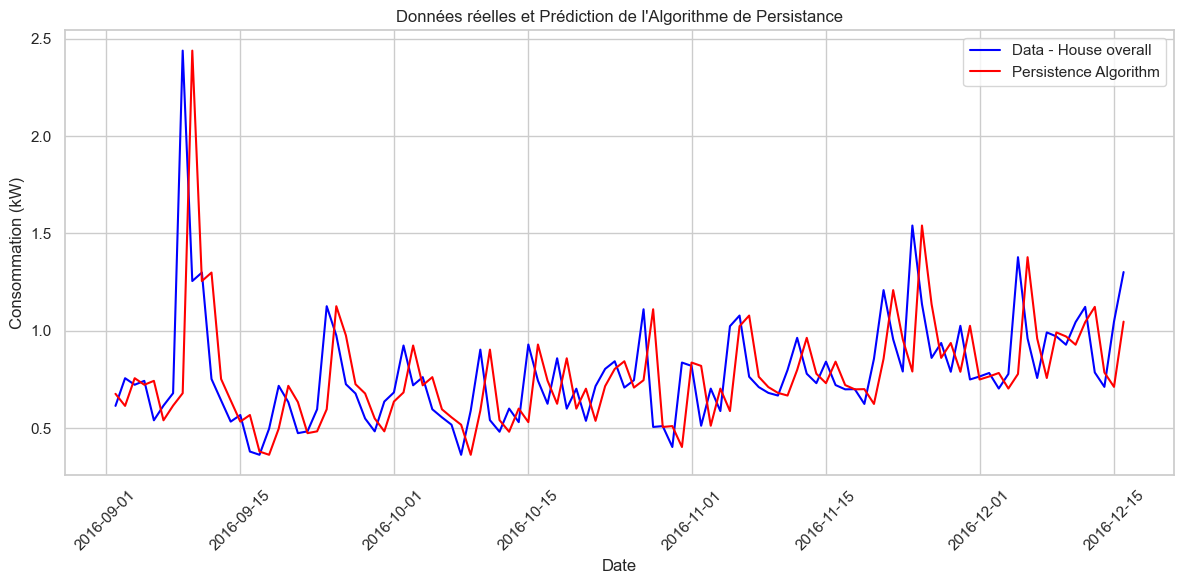

In [85]:
import matplotlib.pyplot as plt

# Créer une figure avec une taille personnalisée
plt.figure(figsize=(12, 6))  # Largeur de 12 pouces et hauteur de 6 pouces

# Tracer les courbes des données réelles et de l'algorithme de persistance
plt.plot(test, c='blue', label='Data - House overall')  # Données réelles en bleu
plt.plot(baseline_test, c='red', label='Persistence Algorithm')  # Algorithme de persistance en rouge

# Ajouter un titre
plt.title('Données réelles et Prédiction de l\'Algorithme de Persistance')

# Ajouter un label pour l'axe Y
plt.ylabel('Consommation (kW)')

# Ajouter un label pour l'axe X
plt.xlabel('Date')

# Ajouter une légende pour distinguer les courbes
plt.legend()

# Activer la grille pour une meilleure lisibilité
plt.grid(True)

# Ajuster la rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajuster les marges pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcul de l'Erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(test, baseline_test))

# Calcul de l'Erreur absolue moyenne (MAE)
mae = mean_absolute_error(test, baseline_test)

# Calcul de l'Erreur absolue moyenne en pourcentage (MAPE)
mape = np.mean(np.abs(baseline_test - test) / np.abs(test)) * 100

# Calcul de l'Erreur absolue moyenne normalisée (MASE)
# Calculer la somme des différences absolues sur l'ensemble d'entraînement
train_diff = np.abs(np.diff(train))
mase = np.mean(np.abs(test - baseline_test)) / (train_diff.sum() / (len(train) - 1))

# Calcul du Score R²
r2 = r2_score(test, baseline_test)

# Afficher les résultats des métriques
print(f"Erreur quadratique moyenne (RMSE) : {rmse:.4f}")
print(f"Erreur absolue moyenne (MAE) : {mae:.4f}")
print(f"Erreur absolue moyenne en pourcentage (MAPE) : {mape:.2f}%")
print(f"Erreur absolue moyenne normalisée (MASE) : {mase:.4f}")
print(f"Score R² : {r2:.4f}")


Erreur quadratique moyenne (RMSE) : 0.3035
Erreur absolue moyenne (MAE) : 0.1944
Erreur absolue moyenne en pourcentage (MAPE) : 23.34%
Erreur absolue moyenne normalisée (MASE) : 0.7895
Score R² : -0.2031


In [87]:
# Créer une série de données moyennes journalières pour la colonne 'House overall'
data_daily = data['House overall'].resample('D').mean()

# Calculer la moyenne mobile sur une fenêtre de 10 jours
rollingMEAN = data_daily.rolling(window=10).mean()

# Calculer l'écart type mobile sur la même fenêtre
rollingSTD = data_daily.rolling(window=10).std()

# Afficher les premières lignes pour vérifier
print("Moyenne mobile sur 10 jours :")
print(rollingMEAN.head(15))

print("\nÉcart type mobile sur 10 jours :")
print(rollingSTD.head(15))


Moyenne mobile sur 10 jours :
time
2016-01-01         NaN
2016-01-02         NaN
2016-01-03         NaN
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-09         NaN
2016-01-10    1.077051
2016-01-11    1.068014
2016-01-12    1.048206
2016-01-13    1.039328
2016-01-14    1.032359
2016-01-15    1.006356
Freq: D, Name: House overall, dtype: float64

Écart type mobile sur 10 jours :
time
2016-01-01         NaN
2016-01-02         NaN
2016-01-03         NaN
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-09         NaN
2016-01-10    0.129394
2016-01-11    0.122967
2016-01-12    0.097257
2016-01-13    0.091135
2016-01-14    0.093529
2016-01-15    0.105073
Freq: D, Name: House overall, dtype: float64


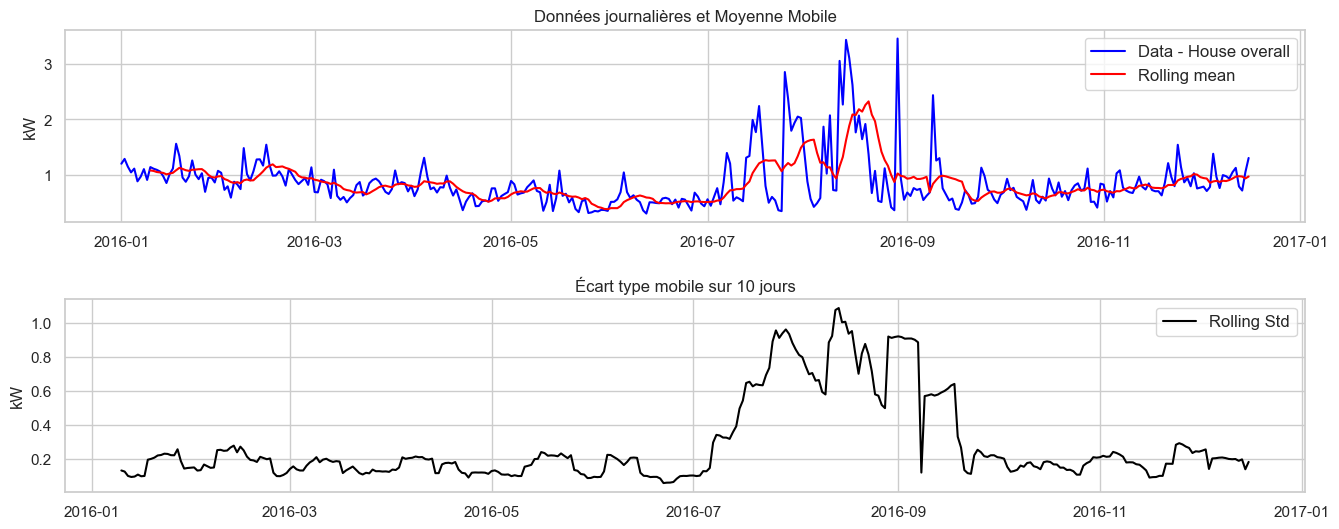

In [88]:
import matplotlib.pyplot as plt

# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6))

# Ajuster l'espace entre les sous-graphiques
plt.subplots_adjust(hspace=0.4)

# Tracer les données journalières et la moyenne mobile sur le premier sous-graphe (ax1)
ax1.plot(data_daily, c='blue', label='Data - House overall')  # Données journalières en bleu
ax1.plot(rollingMEAN, c='red', label='Rolling mean')  # Moyenne mobile en rouge
ax1.set_title('Données journalières et Moyenne Mobile')
ax1.set_ylabel('kW')  # Label de l'axe y
ax1.legend(fontsize=12)  # Légende avec taille de police 12
ax1.grid(True)  # Activer la grille pour le premier sous-graphe

# Tracer l'écart type mobile sur le second sous-graphe (ax2)
ax2.plot(rollingSTD, c='black', label='Rolling Std')  # Écart type mobile en noir
ax2.set_title('Écart type mobile sur 10 jours')
ax2.set_ylabel('kW')  # Label de l'axe y
ax2.legend(fontsize=12)  # Légende avec taille de police 12
ax2.grid(True)  # Activer la grille pour le second sous-graphe

# Afficher le graphique
plt.show()


In [89]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Appliquer le test Dickey-Fuller avec sélection automatique des retards
resultDFtest = adfuller(data_daily, autolag='AIC')

# Stocker les résultats sous forme de Series pour une meilleure lisibilité
Out = pd.Series(resultDFtest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

# Ajouter les valeurs critiques (Critical Values) au tableau de résultats
for key1, value1 in resultDFtest[4].items():
    Out['Critical Value (%s)' % key1] = value1

# Afficher les résultats du test
print('DICK-FULLER RESULTS: \n\n{}'.format(Out))


DICK-FULLER RESULTS: 

Test Statistic                  -2.988003
p-value                          0.036030
#Lags Used                      10.000000
Number of Observations Used    340.000000
Critical Value (1%)             -3.449730
Critical Value (5%)             -2.870079
Critical Value (10%)            -2.571319
dtype: float64


In [90]:
# Calcul de la différenciation première
data_daily_diff = data_daily - data_daily.shift(1)

# Supprimer les valeurs manquantes générées par le décalage
data_daily_diff = data_daily_diff.dropna()

# Afficher les premières lignes pour vérifier
print(data_daily_diff.head())


time
2016-01-02    0.087296
2016-01-03   -0.139162
2016-01-04   -0.104474
2016-01-05    0.067558
2016-01-06   -0.229657
Freq: D, Name: House overall, dtype: float64


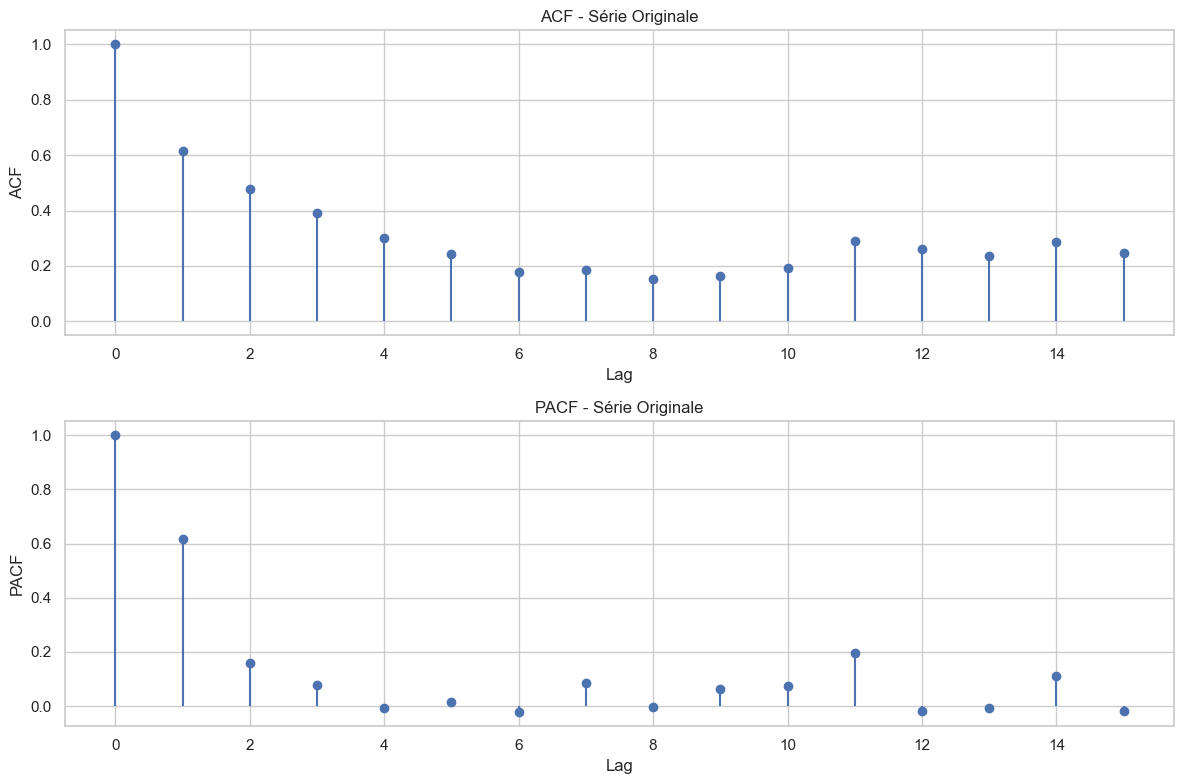

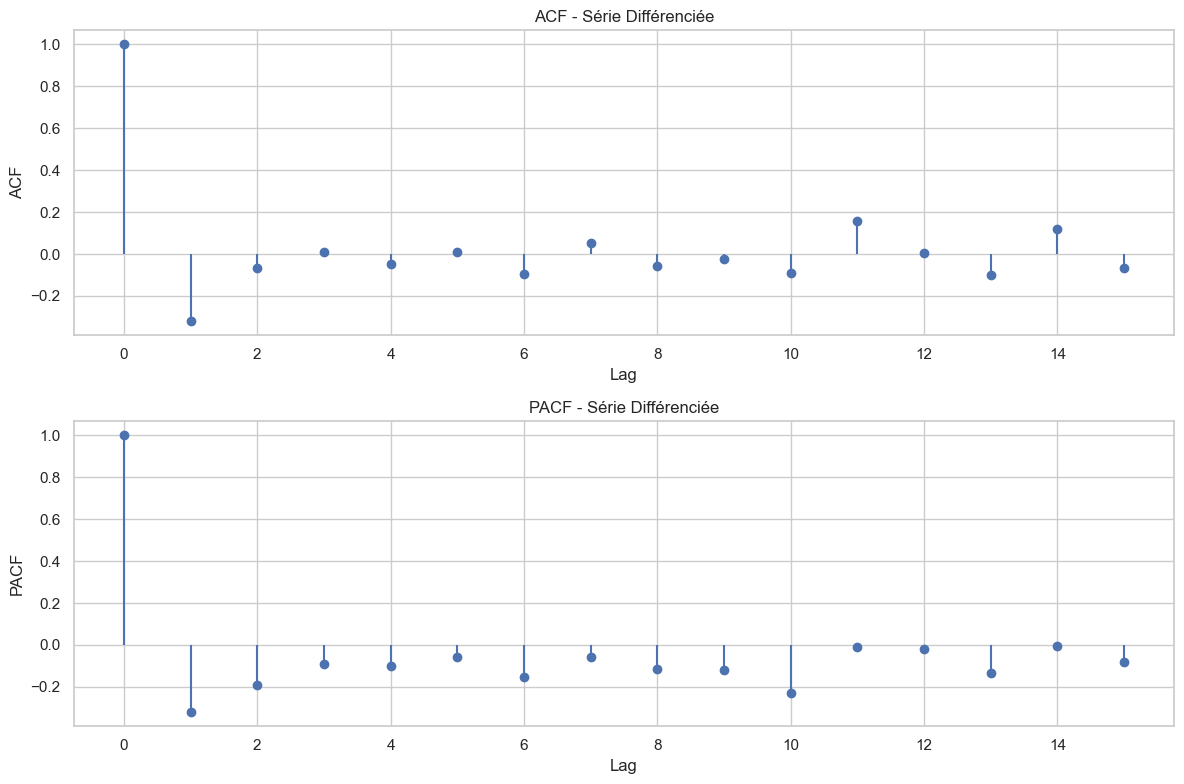

In [91]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Calcul de l'ACF et du PACF pour la série originale (data_daily)
ACF = acf(data_daily, nlags=15)  # ACF pour la série originale, jusqu'à 15 lags
PACF = pacf(data_daily, nlags=15, method='ols')  # PACF pour la série originale, jusqu'à 15 lags, méthode OLS

# Calcul de l'ACF et du PACF pour la série différenciée (data_daily_diff)
ACF1 = acf(data_daily_diff, nlags=15)  # ACF pour la série différenciée
PACF1 = pacf(data_daily_diff, nlags=15, method='ols')  # PACF pour la série différenciée, méthode OLS

# Tracer l'ACF et le PACF pour la série originale
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Tracer l'ACF pour la série originale
axes[0].stem(range(len(ACF)), ACF, basefmt=" ")
axes[0].set_title('ACF - Série Originale')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')

# Tracer du PACF pour la série originale
axes[1].stem(range(len(PACF)), PACF, basefmt=" ")
axes[1].set_title('PACF - Série Originale')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')

# Ajuster l'espace entre les graphiques
plt.tight_layout()
plt.show()

# Tracer l'ACF et le PACF pour la série différenciée
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Tracé de l'ACF pour la série différenciée
axes[0].stem(range(len(ACF1)), ACF1, basefmt=" ")
axes[0].set_title('ACF - Série Différenciée')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')

# Tracé du PACF pour la série différenciée
axes[1].stem(range(len(PACF1)), PACF1, basefmt=" ")
axes[1].set_title('PACF - Série Différenciée')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')

# Ajuster l'espace entre les graphiques
plt.tight_layout()
plt.show()



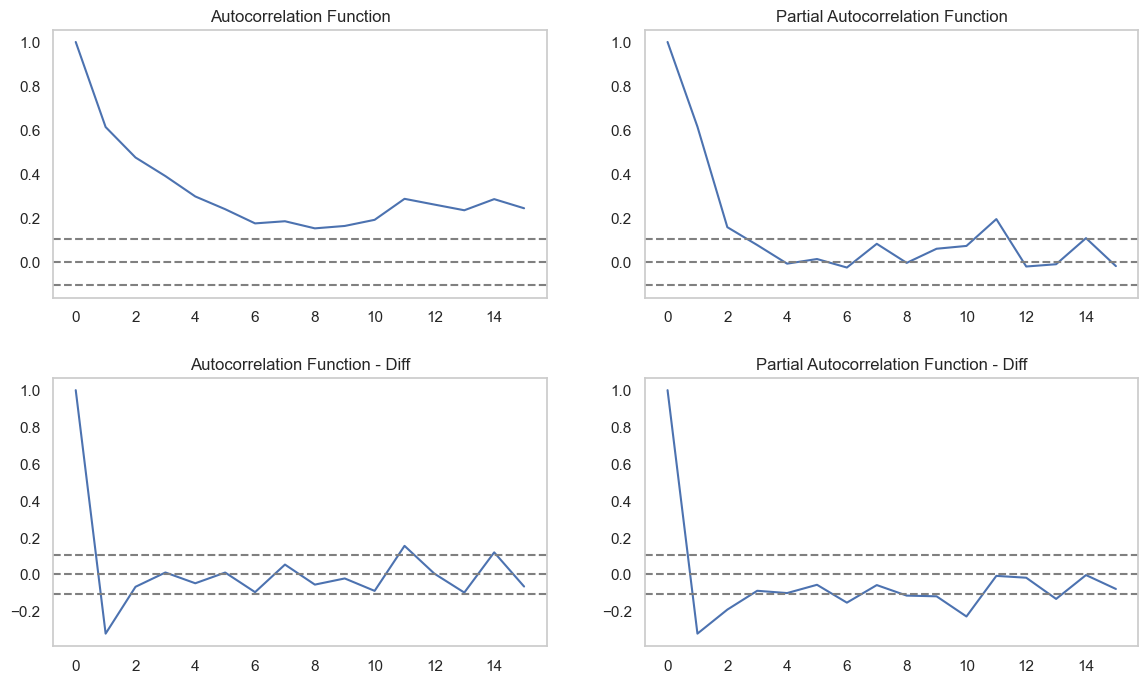

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Définir une fonction pour tracer les graphiques avec des seuils de confiance à ±1.96/√n
def plots_corr(ax, func, dat, title):
    # Tracer les ACF ou PACF
    ax.plot(func)
    
    # Ajouter les lignes horizontales pour y=0 et les seuils de confiance à ±1.96/√n
    ax.axhline(y=0, linestyle='--', c='gray')
    ax.axhline(y=-1.96/np.sqrt(len(dat)), linestyle='--', c='gray')
    ax.axhline(y=1.96/np.sqrt(len(dat)), linestyle='--', c='gray')
    
    # Ajouter la grille et le titre
    ax.grid()
    ax.set_title(title)

# Créer une figure avec quatre sous-graphiques (2x2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 8))

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(hspace=0.3)

# Tracer les ACF et PACF pour les données originales et différenciées
plots_corr(ax1, ACF, data_daily, 'Autocorrelation Function')
plots_corr(ax2, PACF, data_daily, 'Partial Autocorrelation Function')
plots_corr(ax3, ACF1, data_daily_diff, 'Autocorrelation Function - Diff')
plots_corr(ax4, PACF1, data_daily_diff, 'Partial Autocorrelation Function - Diff')

# Afficher les graphiques
plt.show()


In [93]:
# Diviser la série temporelle en ensembles d'entraînement (70%) et de test (30%)
size = int(len(data_daily) * 0.7)

# Ensemble d'entraînement (70% des données)
train = data_daily[:size]

# Ensemble de test (30% des données)
test = data_daily[size:]

# Afficher le nombre total de points dans la série, l'ensemble d'entraînement et l'ensemble de test
print('Number of points in series:', len(data_daily))
print('Number of points in train:', len(train))
print('Number of points in test:', len(test))


Number of points in series: 351
Number of points in train: 245
Number of points in test: 106


In [94]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


In [95]:
# Créer le modèle ARIMA avec l'ordre (2, 1, 1)
model = ARIMA(train, order=(2, 1, 1))

# Afficher le modèle
print(model)


In [96]:
# Créer le modèle ARIMA avec une composante saisonnière (5, 0, 1, 12)
model = sm.tsa.SARIMAX(train, order=(2, 1, 1), seasonal_order=(5, 0, 1, 12))

# Afficher le modèle
print(model)


In [97]:
# Ajuster le modèle aux données d'entraînement
model_fit = model.fit()

# Afficher l'AIC du modèle ajusté
print('Akaike information criterion: ', model_fit.aic)


c:\Users\dz astore\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Akaike information criterion:  259.78218248049984


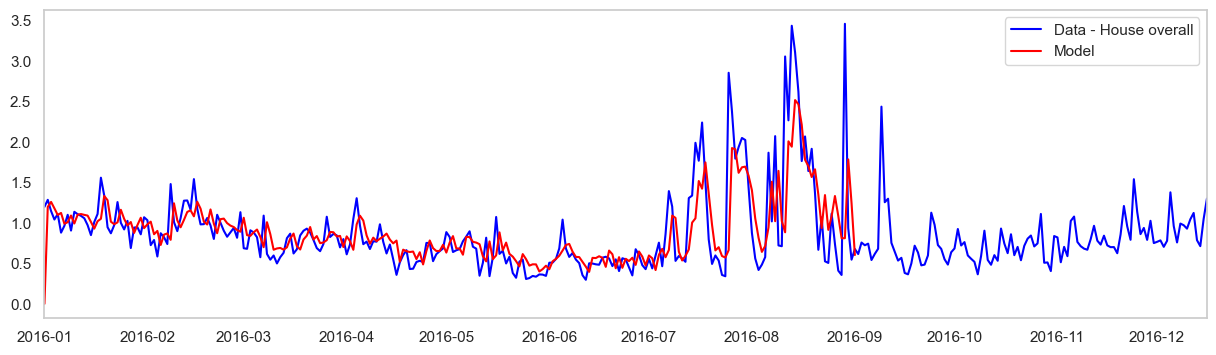

In [98]:
import matplotlib.pyplot as plt

# Tracer les données originales et les prédictions du modèle ajusté
plt.figure(figsize=(15, 4))  # Définir la taille de la figure

# Tracer les données originales
plt.plot(data_daily, c='blue', label='Data - House overall')

# Tracer les prédictions du modèle ajusté
plt.plot(model_fit.predict(dynamic=False), c='red', label='Model')

# Ajouter la légende
plt.legend()

# Ajouter la grille et ajuster les marges
plt.grid()
plt.margins(x=0)

# Afficher le graphique
plt.show()


In [99]:
# Afficher le résumé du modèle ajusté
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                      House overall   No. Observations:                  245
Model:             SARIMAX(2, 1, 1)x(5, 0, 1, 12)   Log Likelihood                -119.891
Date:                            Tue, 17 Dec 2024   AIC                            259.782
Time:                                    14:00:49   BIC                            294.754
Sample:                                01-01-2016   HQIC                           273.867
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4813      0.066      7.333      0.000       0.353       0.610
ar.L2          0.0835      0.050   

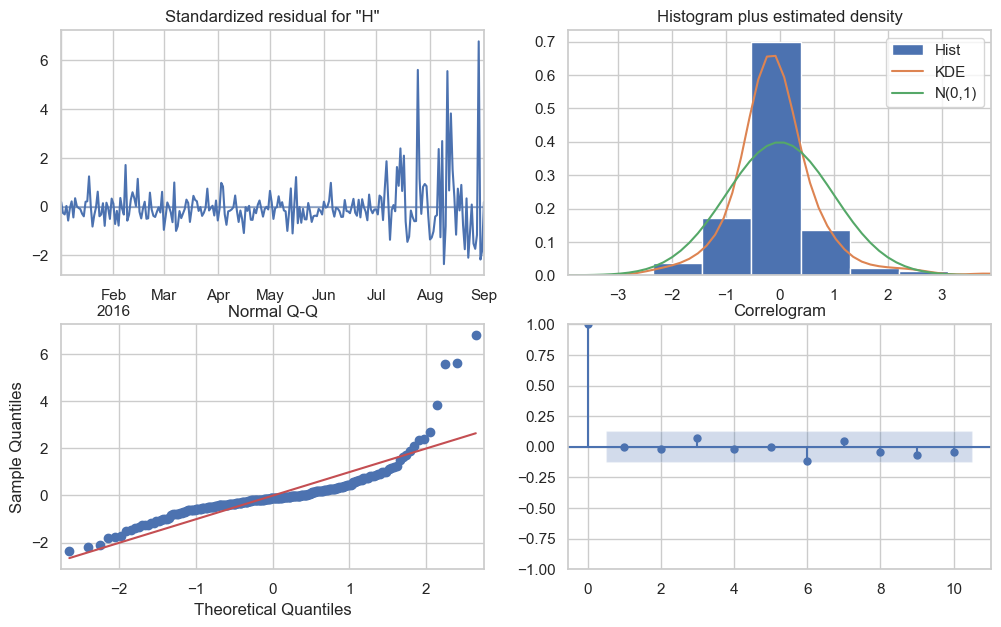

In [100]:
# Afficher les diagnostics du modèle ajusté
model_fit.plot_diagnostics(figsize=(12, 7))

# Afficher le graphique
plt.show()


In [101]:
new_fit = model_fit.append(data_daily[size:size+1], refit=False)


In [102]:
forecast = model_fit.forecast(len(test))
confidence = model_fit.get_forecast(len(test)).conf_int(0.05)

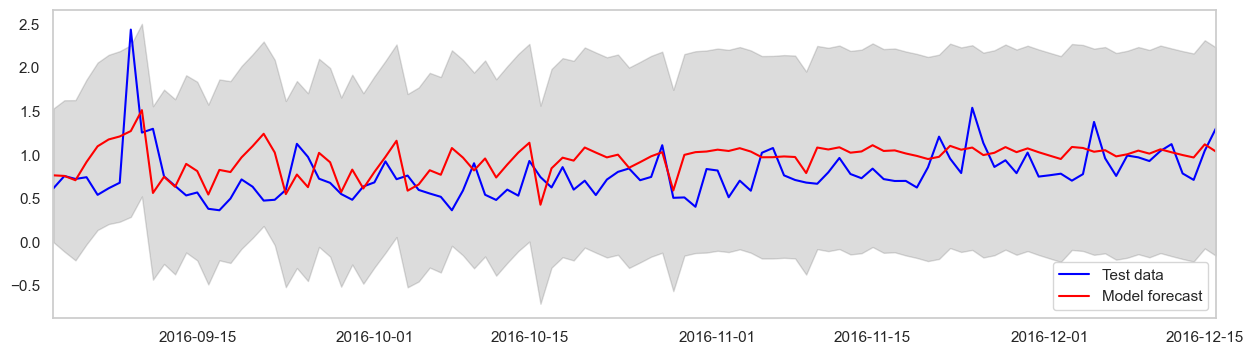

In [103]:
plt.figure(figsize=(15,4))
plt.plot(test, c='blue', label='Test data')
plt.plot(forecast, c='red', label='Model forecast')
plt.fill_between(confidence.index,confidence['lower House overall'],confidence['upper House overall'], color='k', alpha=0.15)
plt.legend()
plt.grid()
plt.margins(x=0)

In [104]:
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE=mean_absolute_error(test, forecast)
MAPE=np.mean(np.abs(forecast- test) / np.abs(test))
MASE = np.mean(np.abs(test- forecast)) / (np.abs(np.diff(train)).sum() / (len(train)-1))

print('MAE: %.3f' % MAE)
print('MAPE: %.3f' % MAPE)
print('MASE: %.3f' % MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))

MSE: 0.107
RMSE: 0.327
MAE: 0.266
MAPE: 0.397
MASE: 1.083
R^2 score: -0.399


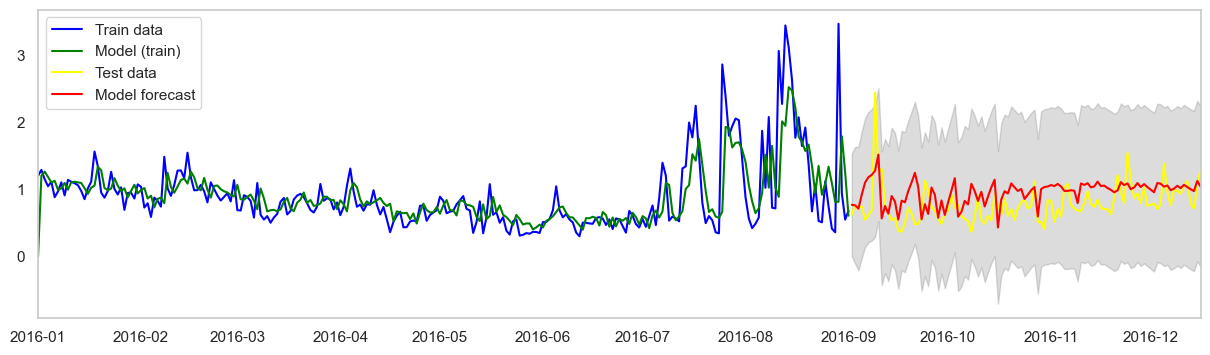

In [105]:
plt.figure(figsize=(15,4))
plt.plot(train, c='blue', label='Train data')
plt.plot(model_fit.predict(dynamic=False), c='green', label='Model (train)')
plt.plot(test, c='yellow', label='Test data')
plt.plot(forecast, c='red', label='Model forecast')
plt.fill_between(confidence.index,
confidence['lower House overall'],
confidence['upper House overall'], color='k', alpha=0.15)
plt.legend()
plt.grid()
plt.margins(x=0)
